In [6]:
import librosa
import librosa.display
import librosa2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import natsort
from openpyxl import load_workbook
import scipy.io
import scipy
import random
from sklearn.preprocessing import StandardScaler

FIRST SOME MFCC EXPLORATION

a melspectrogram and mel filter bank are plotted <br>
these show that an standard MFCC operation places emphasis on lower frequencies

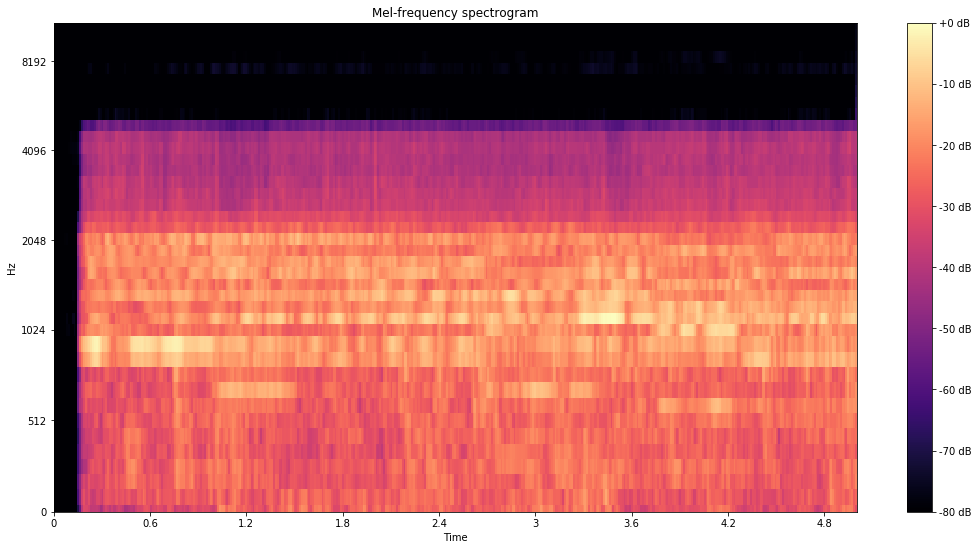

In [28]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
plt.figure(figsize=(18, 9))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, y_axis='mel', sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

Text(0.5, 1.0, 'Mel filter bank')

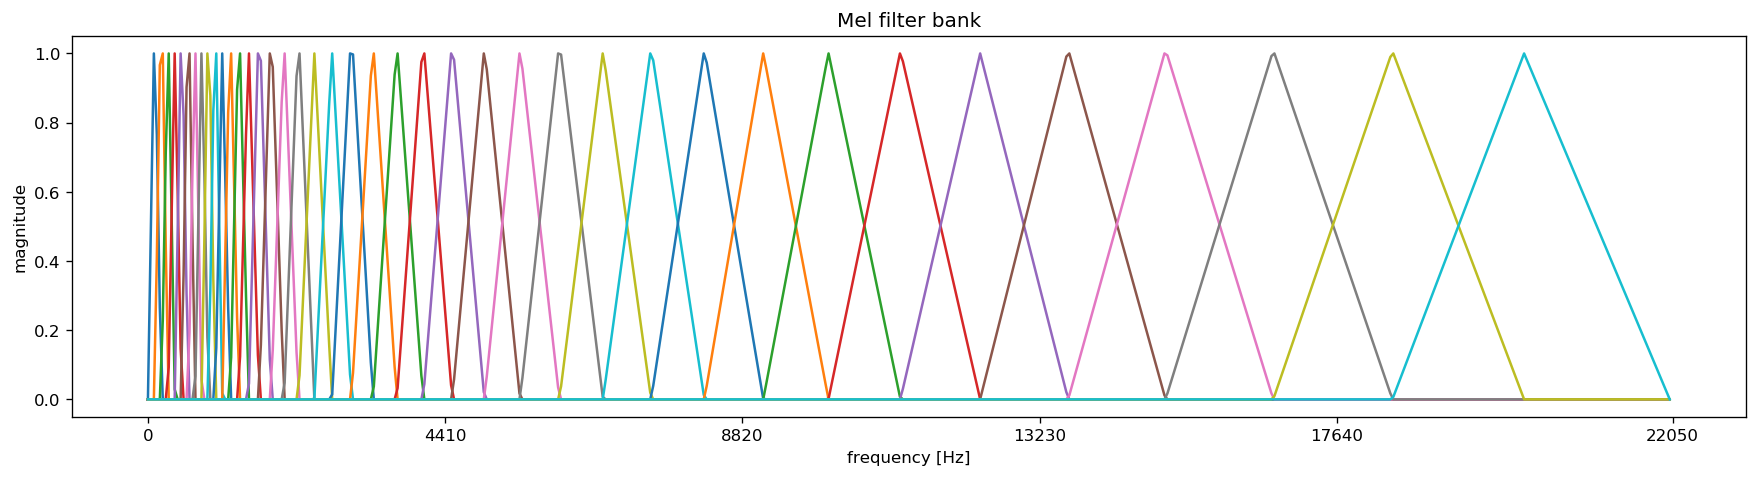

In [29]:
sr = 44100
mel_basis = librosa.filters.mel(sr=sr, n_fft=1024, n_mels=40,fmin=0, fmax=sr / 2)
mel_basis /= np.max(mel_basis, axis=-1)[:, None]
plt.figure(figsize=(18, 4.2),dpi=120)
plt.plot(mel_basis.T)
plt.xticks([  0.,  100.,  200. , 300. , 400.  ,513. ], [0, 4410, 8820, 13230, 17640, 22050])
plt.xlabel('frequency [Hz]')
plt.ylabel('magnitude')
plt.title('Mel filter bank')

PLOT OF THE MFCC PROCESS

plots magnitude spectrum, a Mel filter and the filtered result

<function matplotlib.pyplot.show(*args, **kw)>

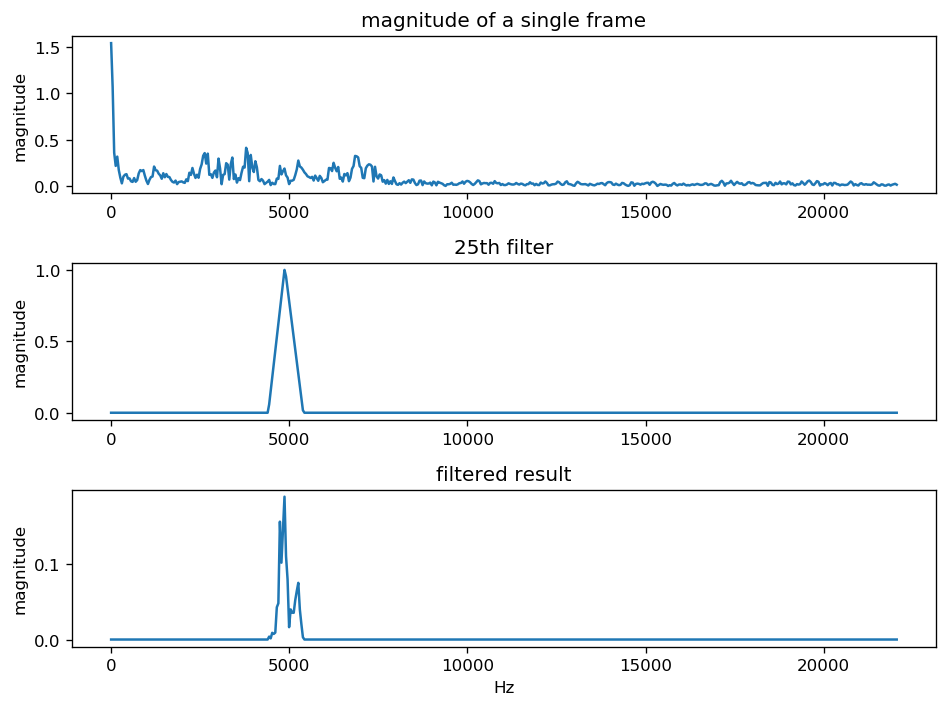

In [32]:
filename = '0_h_10_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/AUGMENTED_DATA/data6/0/{filename}.wav'
y,sr = librosa.load(audio_file, sr=44100, duration=5)

filter_num = 25
# for filter_num in range(0,40):
plt.figure(figsize=(8, 6),dpi=120)

plt.subplot(3,1,1)
f,t,Z = scipy.signal.stft(y,fs=44100,nperseg=1024,noverlap=768)
spec = np.abs(Z.T[1])*100000
plt.plot(f,spec);
plt.title('magnitude of a single frame')
plt.ylabel('magnitude')

plt.subplot(3,1,2)
plt.plot(f,mel_basis[filter_num]);
# plt.xticks([  0.,  100.,  200. , 300. , 400.  ,513. ], [0, 4410, 8820, 13230, 17640, 22050])
plt.title(f'{filter_num}th filter')
plt.ylabel('magnitude')

plt.subplot(3,1,3)
melly = np.multiply(spec,mel_basis[filter_num])    
plt.plot(f,melly)
plt.title('filtered result')
plt.ylabel('magnitude')
plt.xlabel('Hz')

plt.tight_layout()
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_mel_filtering.png')
plt.show

EXPLORING THE INFLUENECE OF USING DIFFERENT IMPULSE RESPOSNE LENGHTS

an original signal is compared to one augmented with an IR os 10ms and of 1000ms

In [2]:
#ORIGINAL SIGNAL
#extaract mfcc of single audio file
filename = 'music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/musan/music/fma/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100, duration=5)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfcc_pre = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_pre = librosa.feature.delta(mfcc_pre)
deltaDelta_pre = librosa.feature.delta(mfcc_pre, order=2)

#write to csv
to_append = f'{filename} ' 
#average psd per filterbank and write to file
for i in mfcc_pre:
    to_append += f' {np.mean(i)}' 
    to_append += f' {np.var(i)}' 
#average speed
for j in delta_pre:
    to_append += f' {np.mean(j)}'
    to_append += f' {np.var(j)}'
#average acceleration
for k in deltaDelta_pre:
    to_append += f' {np.mean(k)}'
    to_append += f' {np.var(k)}'
#write label to file
to_append += f' {d}'
file = open(newFileName, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

In [3]:
#SIGNAL AUGMENTED WITH IR OF 10ms
#extaract mfcc of single audio file
filename = '0_h_10_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfcc_post_10 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_10 = librosa.feature.delta(mfcc_post_10)
deltaDelta_post_10 = librosa.feature.delta(mfcc_post_10, order=2)

#write to csv
to_append = f'{filename} ' 
#average psd per filterbank and write to file
for i in mfcc_post_10:
    to_append += f' {np.mean(i)}' 
    to_append += f' {np.var(i)}' 
#average speed
for j in delta_post_10:
    to_append += f' {np.mean(j)}'
    to_append += f' {np.var(j)}'
#average acceleration
for k in deltaDelta_post_10:
    to_append += f' {np.mean(k)}'
    to_append += f' {np.var(k)}'
#write label to file
to_append += f' {d}'
file = open(newFileName, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

In [4]:
#SIGNAL AUGMENTED WITH IR OF 1000ms
#extaract mfcc of single audio file
filename = '0_h_10_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
mfcc_post_1000 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_1000 = librosa.feature.delta(mfcc_post_1000)
deltaDelta_post_1000 = librosa.feature.delta(mfcc_post_1000, order=2)

#write to csv
to_append = f'{filename} ' 
#average psd per filterbank and write to file
for i in mfcc_post_1000:
    to_append += f' {np.mean(i)}' 
    to_append += f' {np.var(i)}' 
#average speed
for j in delta_post_1000:
    to_append += f' {np.mean(j)}'
    to_append += f' {np.var(j)}'
#average acceleration
for k in deltaDelta_post_1000:
    to_append += f' {np.mean(k)}'
    to_append += f' {np.var(k)}'
#write label to file
to_append += f' {d}'
file = open(newFileName, 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

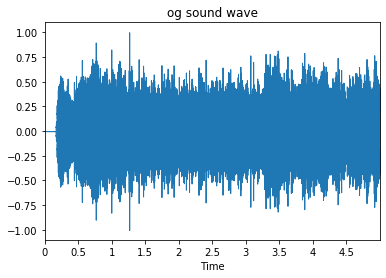

In [5]:
#plot original soundwave to get an idea of the signal
librosa.display.waveplot(y, sr=sr)
plt.title('og sound wave');

In [8]:
#NORMALIZE THE MFCCs
scaler = StandardScaler()
mfcc_pre = scaler.fit_transform(np.array(mfcc_pre, dtype = float))
delta_pre = scaler.fit_transform(np.array(mfcc_pre, dtype = float))
mfcc_post_10 = scaler.fit_transform(np.array(mfcc_post_10, dtype = float))
mfcc_post_1000 = scaler.fit_transform(np.array(mfcc_post_1000, dtype = float))

PLOT ALL MFCC PLOTS INDIVIDUALLY

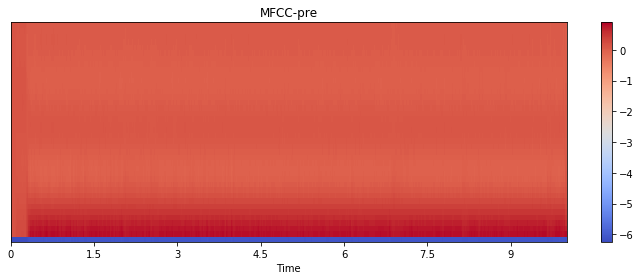

In [9]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_pre, x_axis='time', sr=44100)
plt.colorbar()
plt.title('MFCC-pre')
plt.tight_layout()
plt.show()

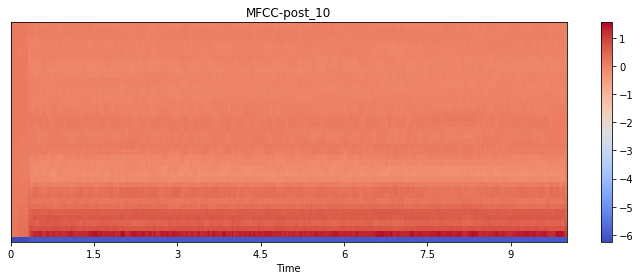

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_post_10, x_axis='time', sr=44100)
plt.colorbar()
plt.title('MFCC-post_10')
plt.tight_layout()
plt.show()

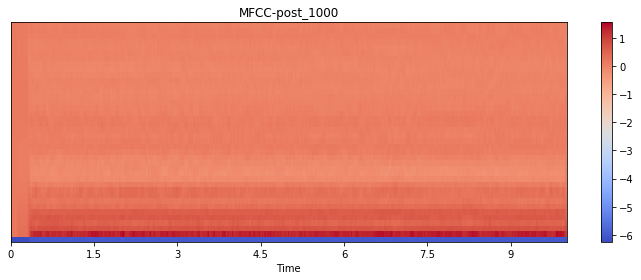

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_post_1000, x_axis='time', sr=44100)
plt.colorbar()
plt.title('MFCC-post_1000')
plt.tight_layout()
plt.show()

COMPARE ALL MFCC PLOTS

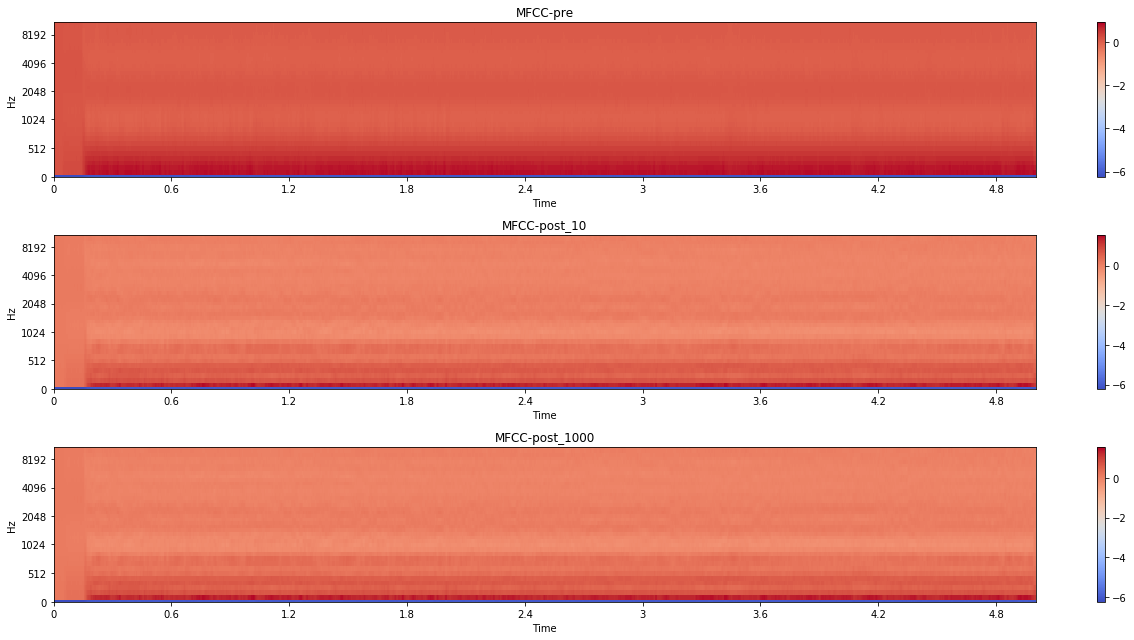

In [12]:
plt.figure(figsize=(18, 9))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc_pre, x_axis='time', sr=44100, hop_length=256, y_axis='mel')
plt.colorbar()
plt.title('MFCC-pre')
plt.tight_layout()
plt.subplot(3,1,2)
librosa.display.specshow(mfcc_post_10, x_axis='time', hop_length=256, sr=44100, y_axis='mel')
plt.colorbar()
plt.title('MFCC-post_10')
plt.tight_layout()
plt.subplot(3,1,3)
librosa.display.specshow(mfcc_post_1000, x_axis='time', hop_length=256, sr=44100, y_axis='mel')
plt.colorbar()
plt.title('MFCC-post_1000')
plt.tight_layout()
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/specs_R.png')
plt.show()

PLOT EACH COEFICIENT FOR EACH SIGNAL

warning: takes a while

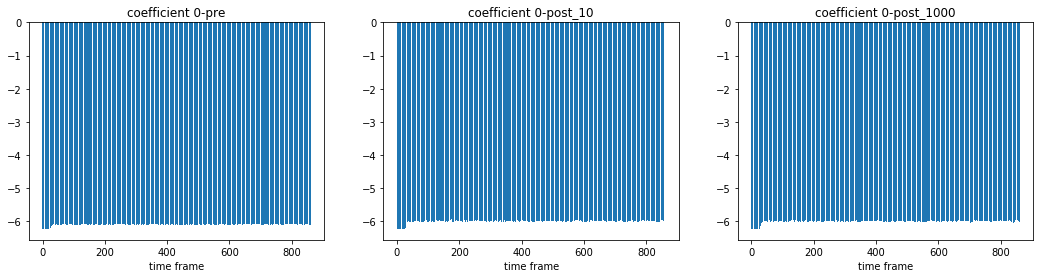

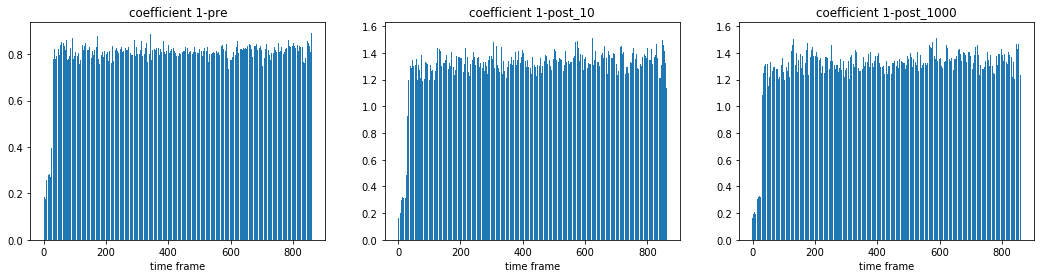

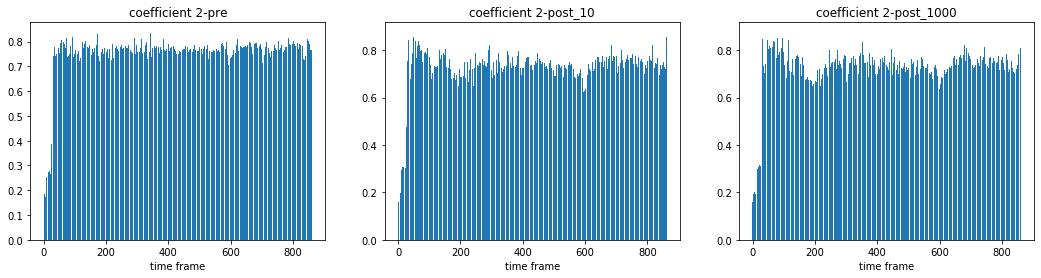

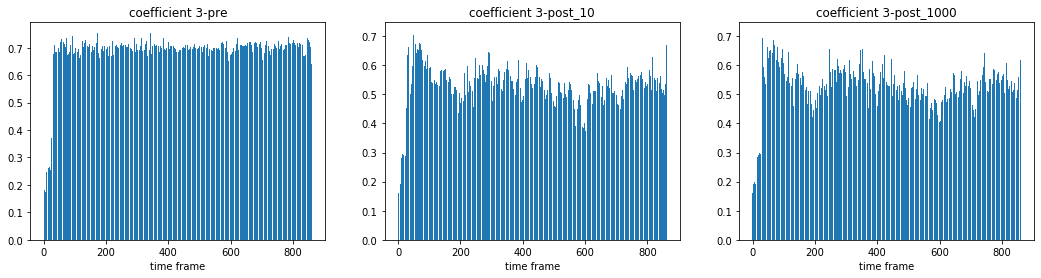

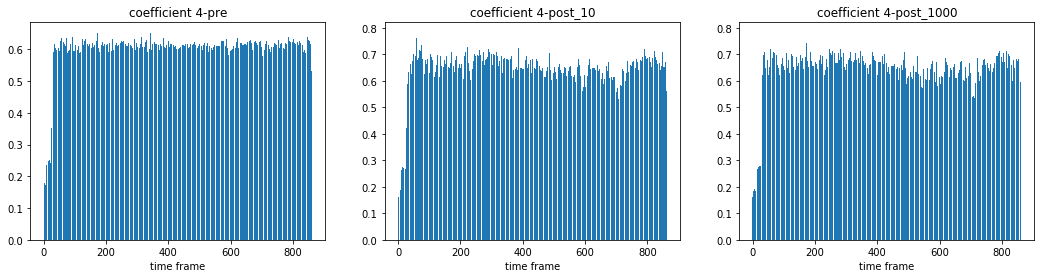

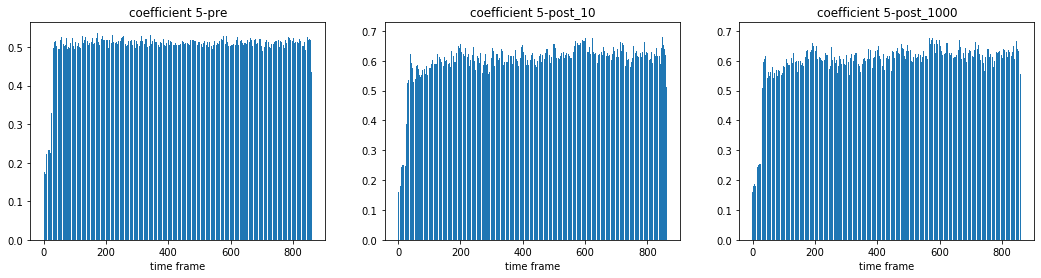

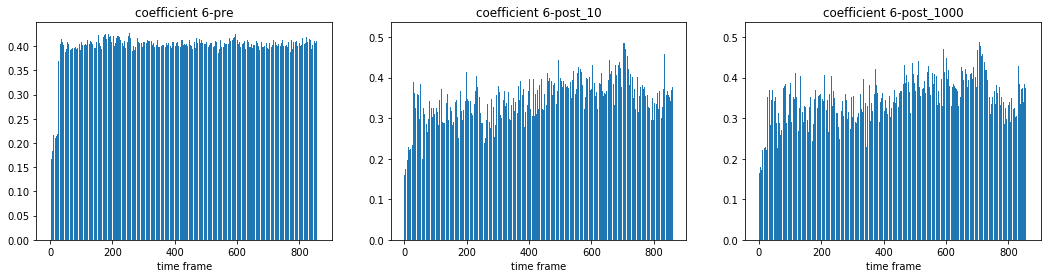

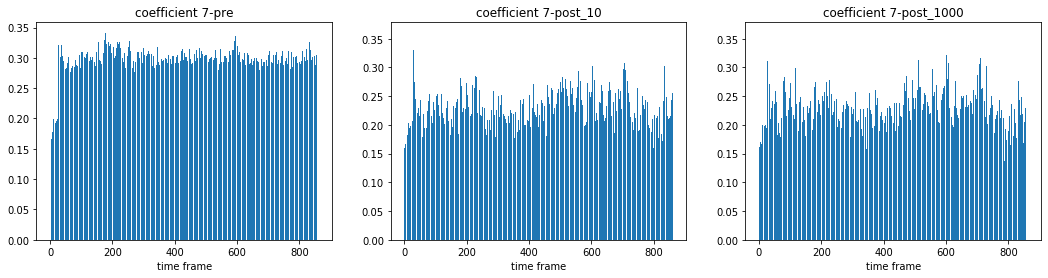

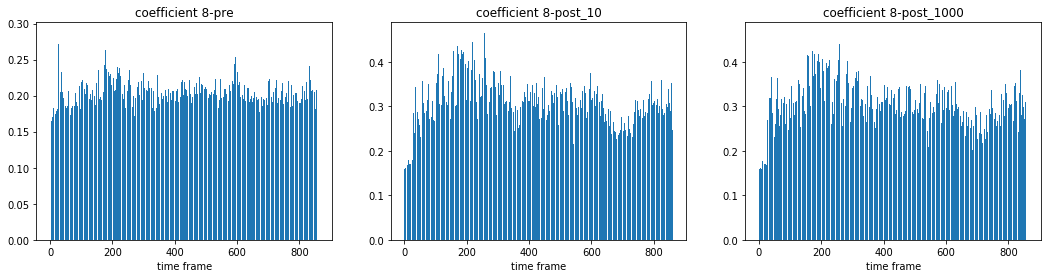

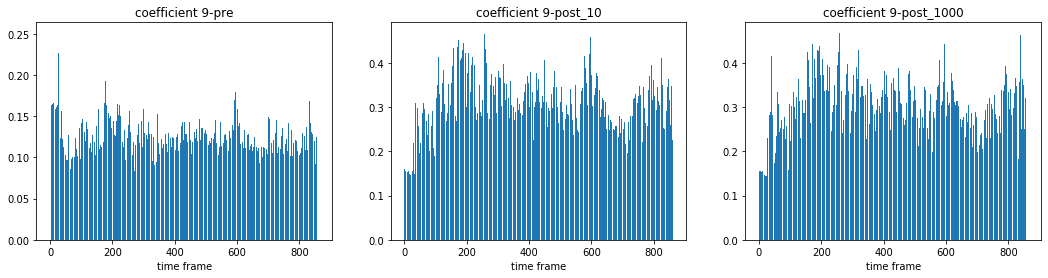

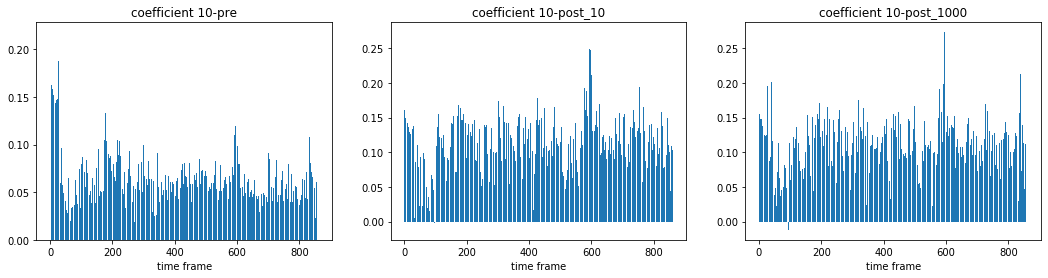

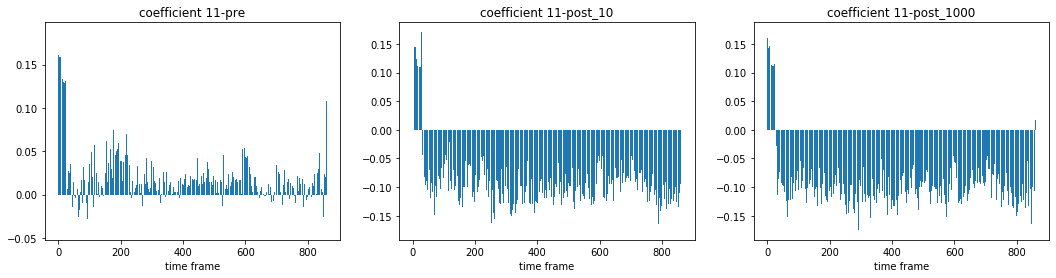

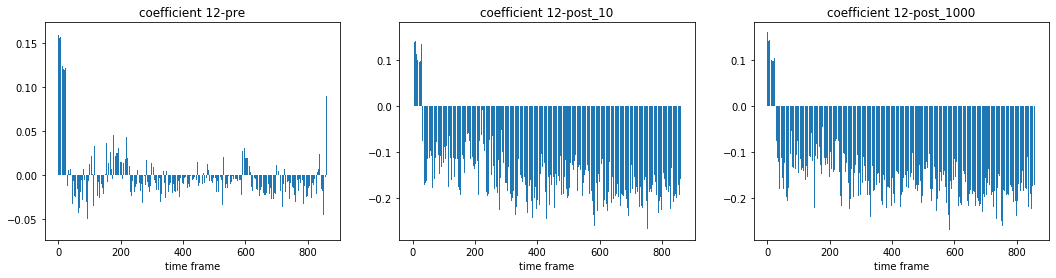

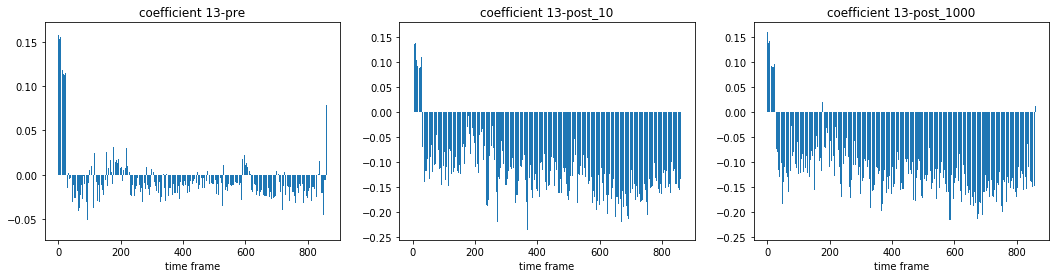

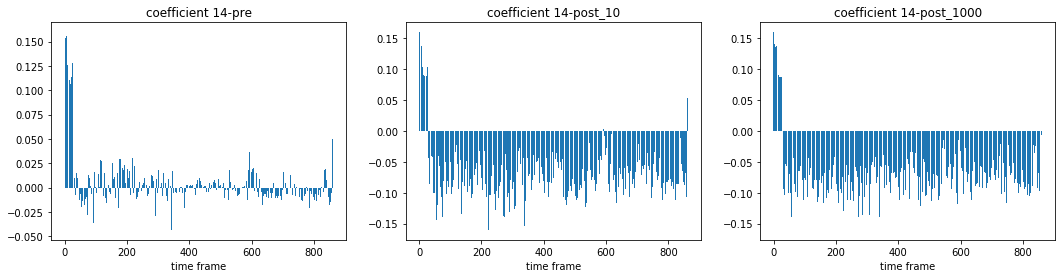

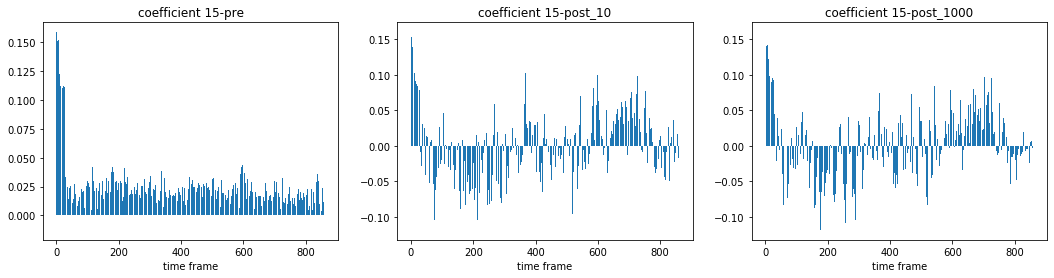

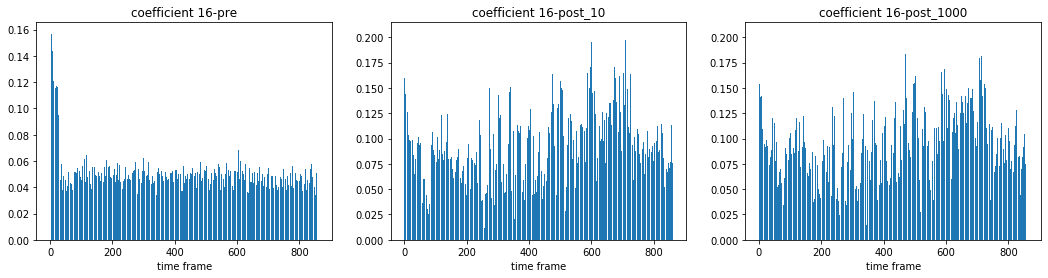

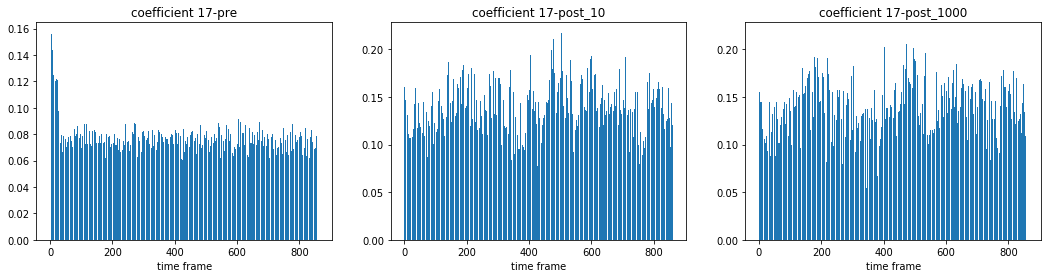

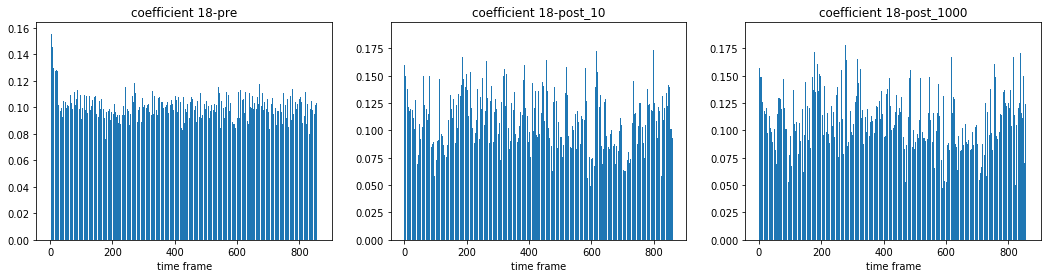

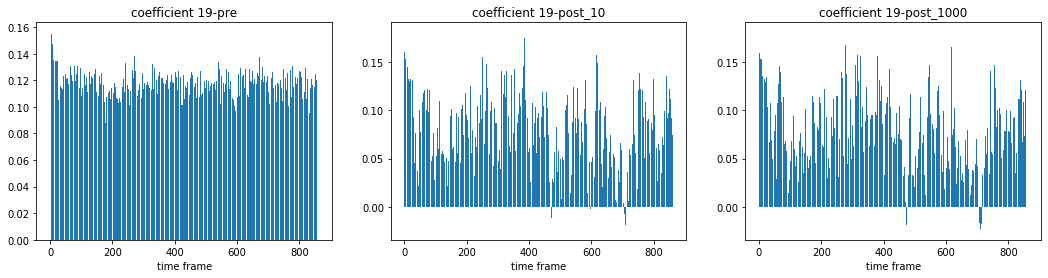

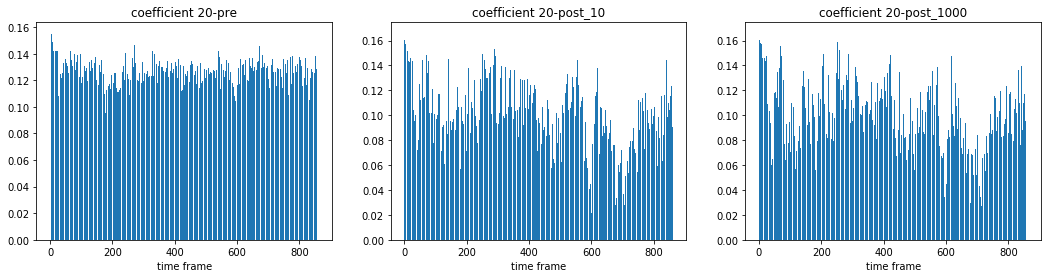

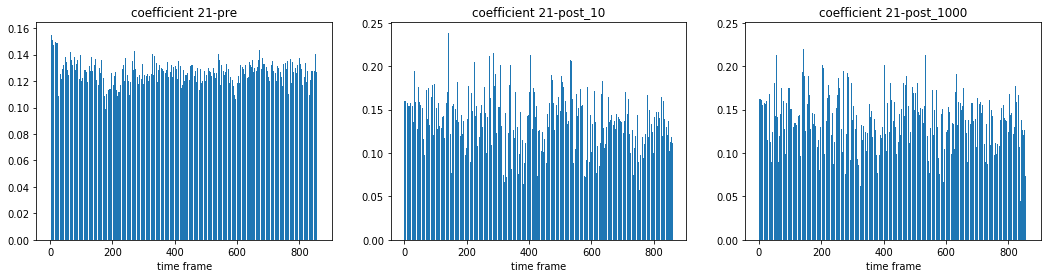

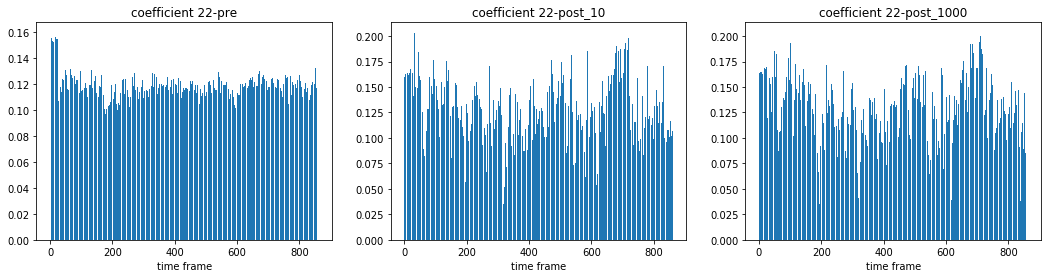

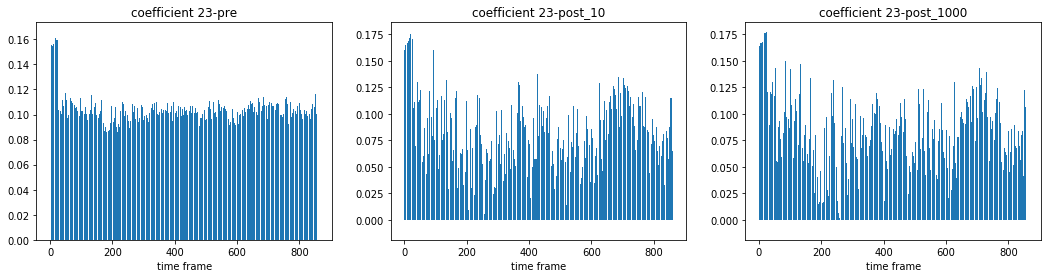

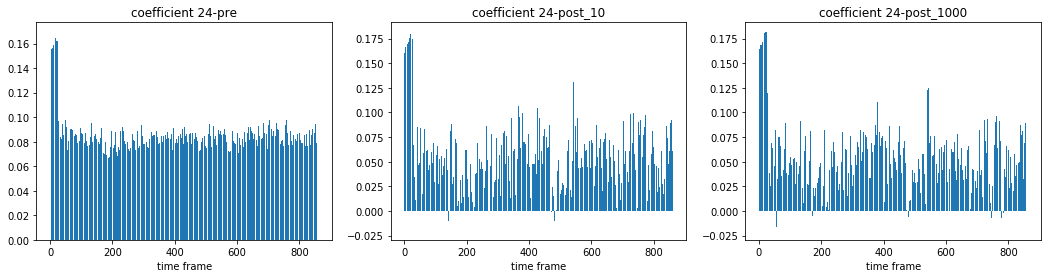

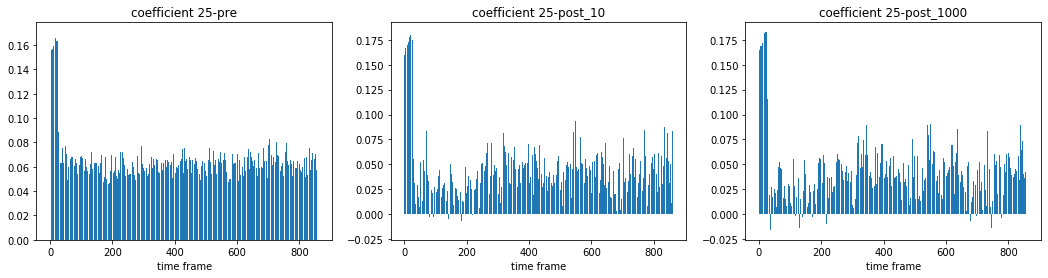

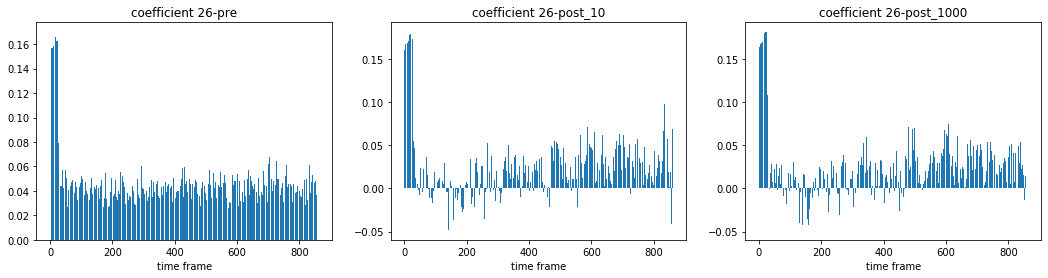

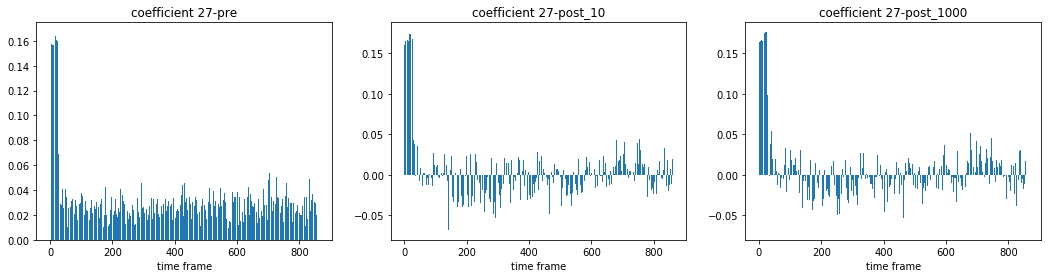

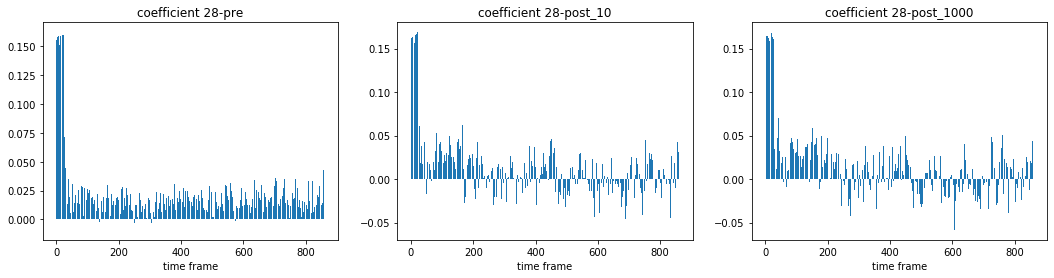

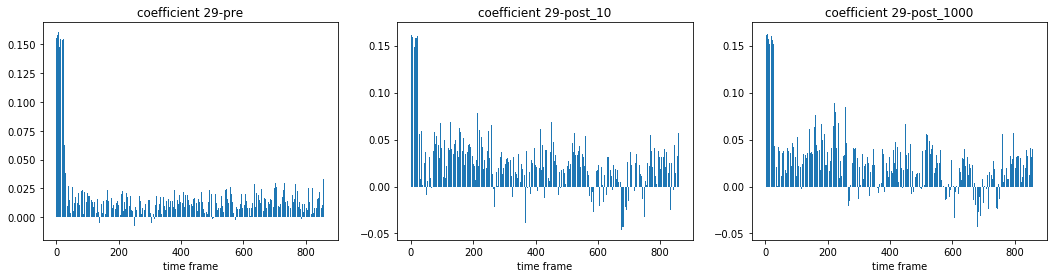

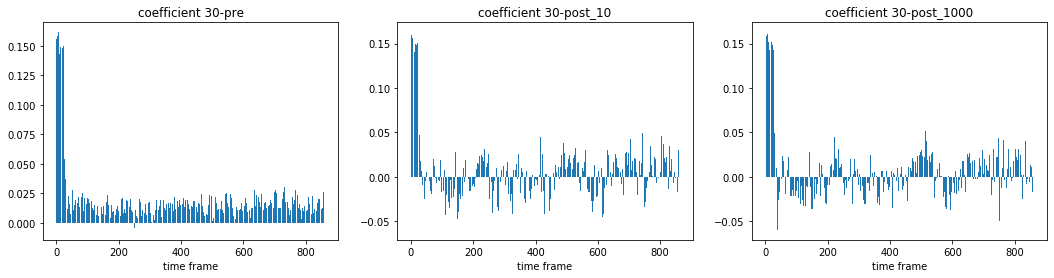

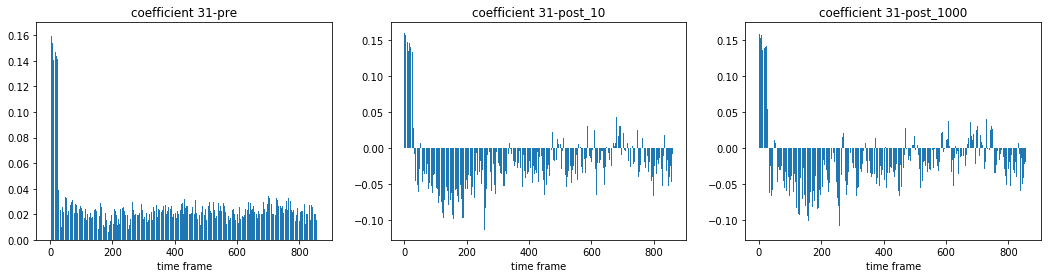

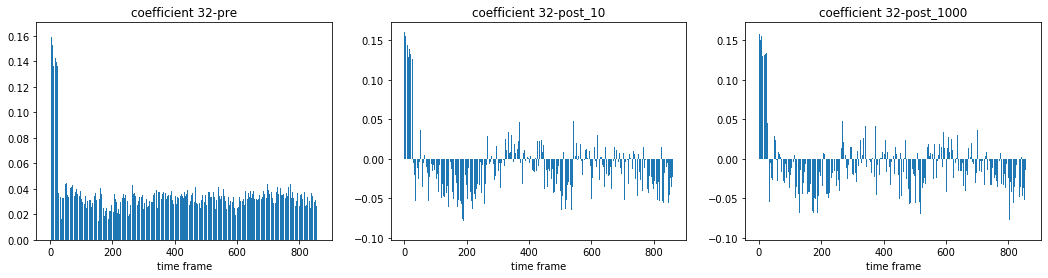

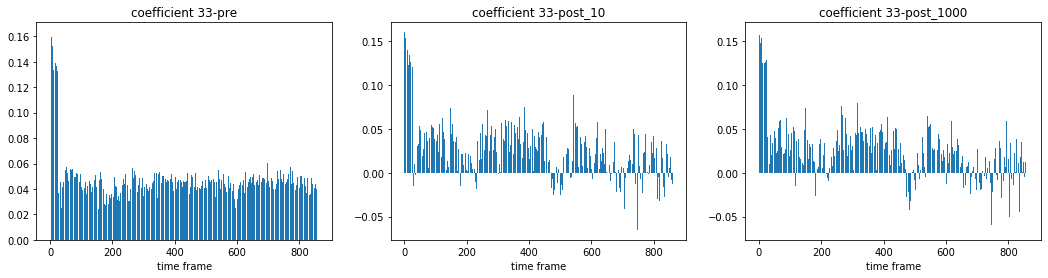

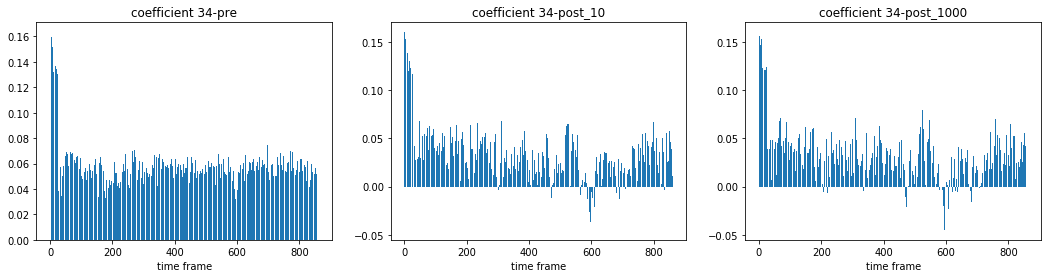

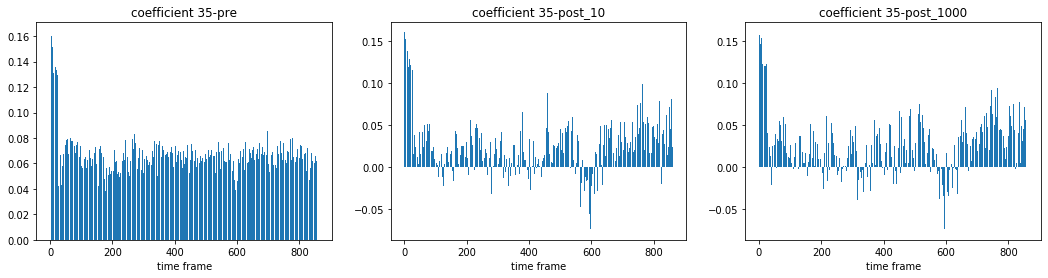

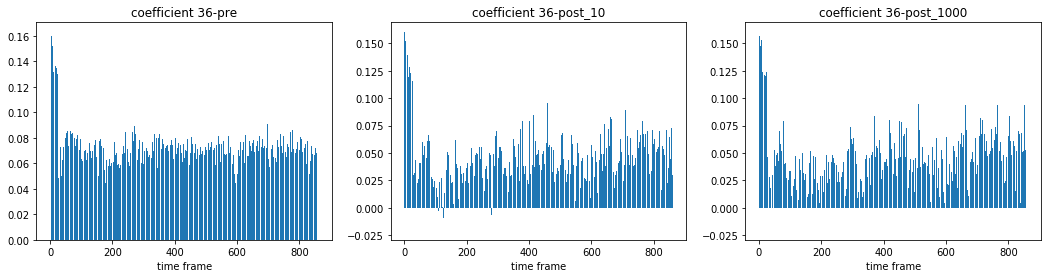

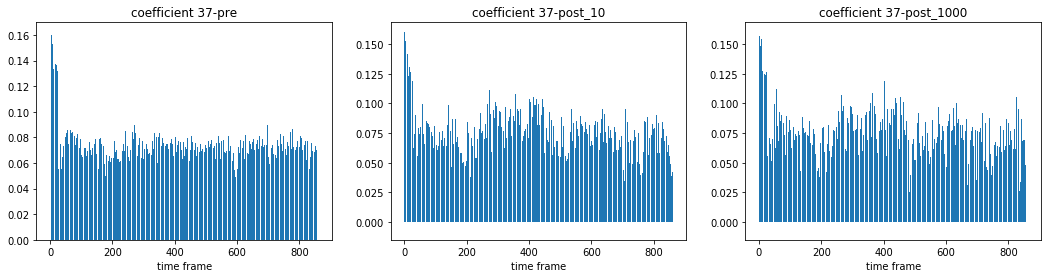

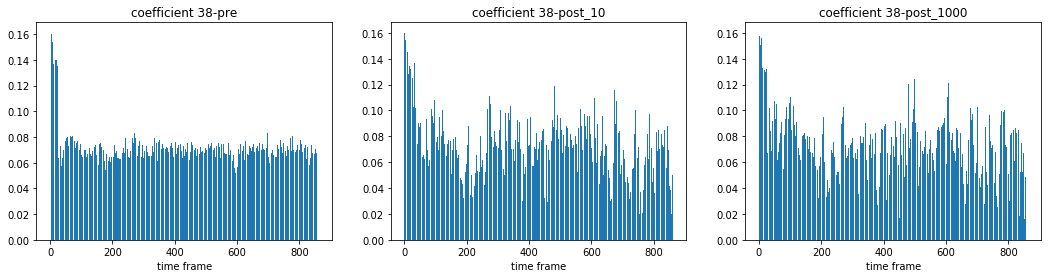

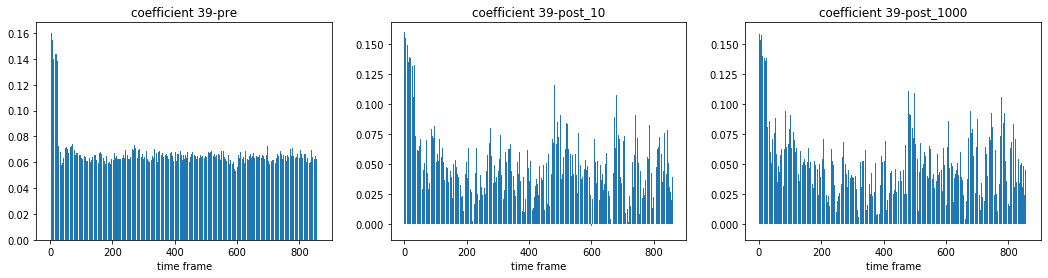

In [13]:
for coef in range(0,40):
    fig, ax = plt.subplots(1, 3,figsize=(18, 4))
    ax[0].bar(np.arange(len(mfcc_pre[coef,:])),mfcc_pre[coef,:], align='center', alpha=1)
    ax[0].set_xlabel('time frame')
    ax[0].set_title(f'coefficient {coef}-pre')
    ax[1].bar(np.arange(len(mfcc_post_10[coef,:])),mfcc_post_10[coef,:], align='center', alpha=1)
    ax[1].set_xlabel('time frame')
    ax[1].set_title(f'coefficient {coef}-post_10')
    ax[2].bar(np.arange(len(mfcc_post_1000[coef,:])),mfcc_post_1000[coef,:], align='center', alpha=1)
    ax[2].set_xlabel('time frame')
    ax[2].set_title(f'coefficient {coef}-post_1000')
    plt.show()

COMPARE STANDARD MFCC AND REVERSE MFCC

for different directions

In [14]:
#whether to compute the standard MFCC or the reverse MFCC
isReverse = 0

In [15]:
#ORIGINAL SIGNAL
#extaract mfcc of single audio file
filename = 'music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/musan/music/fma/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
d = 0
y,sr = librosa.load(audio_file, sr=44100, duration=5)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_pre = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_pre = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)

delta_pre = librosa.feature.delta(mfcc_pre)
deltaDelta_pre = librosa.feature.delta(mfcc_pre, order=2)

In [16]:
#SIGNAL ARRIVING FROM 0°
#extaract mfcc of single audio file
filename = '0_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_0 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_0 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_0 = librosa.feature.delta(mfcc_post_0)
deltaDelta_post_0 = librosa.feature.delta(mfcc_post_0, order=2)

In [17]:
#SIGNAL ARRIVING FROM 90°
#extaract mfcc of single audio file
filename = '90_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_90 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_90 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_90 = librosa.feature.delta(mfcc_post_90)
deltaDelta_post_90 = librosa.feature.delta(mfcc_post_90, order=2)

In [18]:
#SIGNAL ARRIVING FROM 180°
#extaract mfcc of single audio file
filename = '180_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_180 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_180 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_180 = librosa.feature.delta(mfcc_post_180)
deltaDelta_post_180 = librosa.feature.delta(mfcc_post_180, order=2)

In [19]:
#SIGNAL ARRIVING FROM 270°
#extaract mfcc of single audio file
filename = '270_h_100_music-fma-0019'
audio_file = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/audio_selection_data6/{filename}.wav'
newFileName = f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{filename}.csv' #don't forget the '.csv'
y,sr = librosa.load(audio_file, sr=44100)

#get features
fftWindowSize = 1024                 #~23ms (default:2048 =~46ms @44.1kHz)
overlapSize = int(fftWindowSize/4)   #ovelap 75%
numOfMelFilterBanks = 40             #amount of Mel filterbanks
if isReverse:
    mfcc_post_270 = librosa2.feature.reverse_mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
else:
    mfcc_post_270 = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=numOfMelFilterBanks, n_mels = numOfMelFilterBanks, n_fft=fftWindowSize, hop_length=overlapSize)
delta_post_270 = librosa.feature.delta(mfcc_post_270)
deltaDelta_post_270 = librosa.feature.delta(mfcc_post_270, order=2)

In [20]:
#NORMALIZE ALL MFCC
scaler = StandardScaler()
mfcc_pre = scaler.fit_transform(np.array(mfcc_pre, dtype = float))
delta_pre = scaler.fit_transform(np.array(delta_pre, dtype = float))
mfcc_post_0 = scaler.fit_transform(np.array(mfcc_post_0, dtype = float))
mfcc_post_90 = scaler.fit_transform(np.array(mfcc_post_90, dtype = float))
mfcc_post_180 = scaler.fit_transform(np.array(mfcc_post_90, dtype = float))
mfcc_post_270 = scaler.fit_transform(np.array(mfcc_post_90, dtype = float))

PLOT MFCC OF ORIGINAL SIGNAL

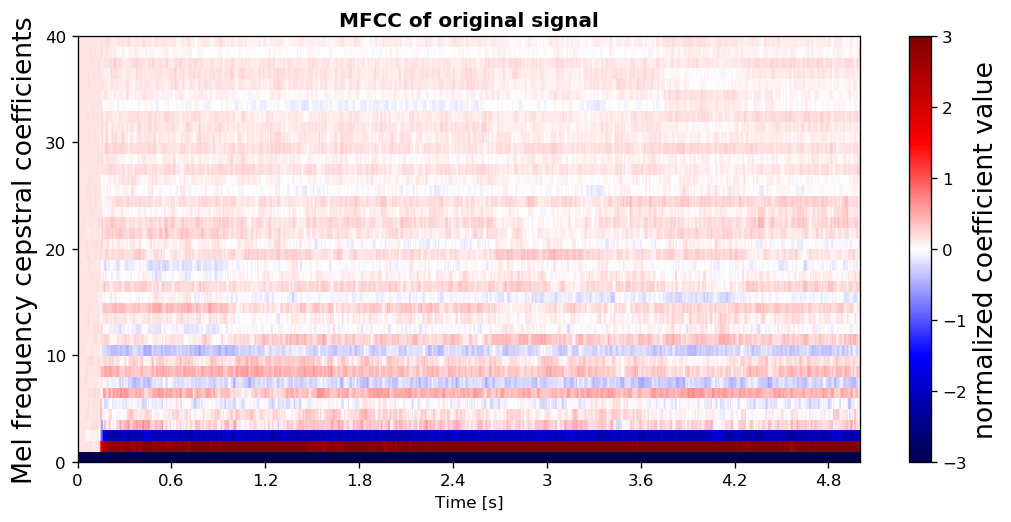

In [21]:
c_min = -3
c_max = 3
plt.figure(figsize=(9, 4.5),dpi=120)
librosa.display.specshow(mfcc_pre, x_axis='time', sr=44100, hop_length=256,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
cb = plt.colorbar()
cb.set_label(label='normalized coefficient value',fontsize=16)# cbar.set_label('MFCCs')
plt.title('MFCC of original signal',weight='bold')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients',fontsize=16)
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()
# plt.savefig(f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{"r_" if isReverse else ""}mfcc_specs_diff_dir_seismic_og.png')

COMPARE ALL MFCC PLOTS

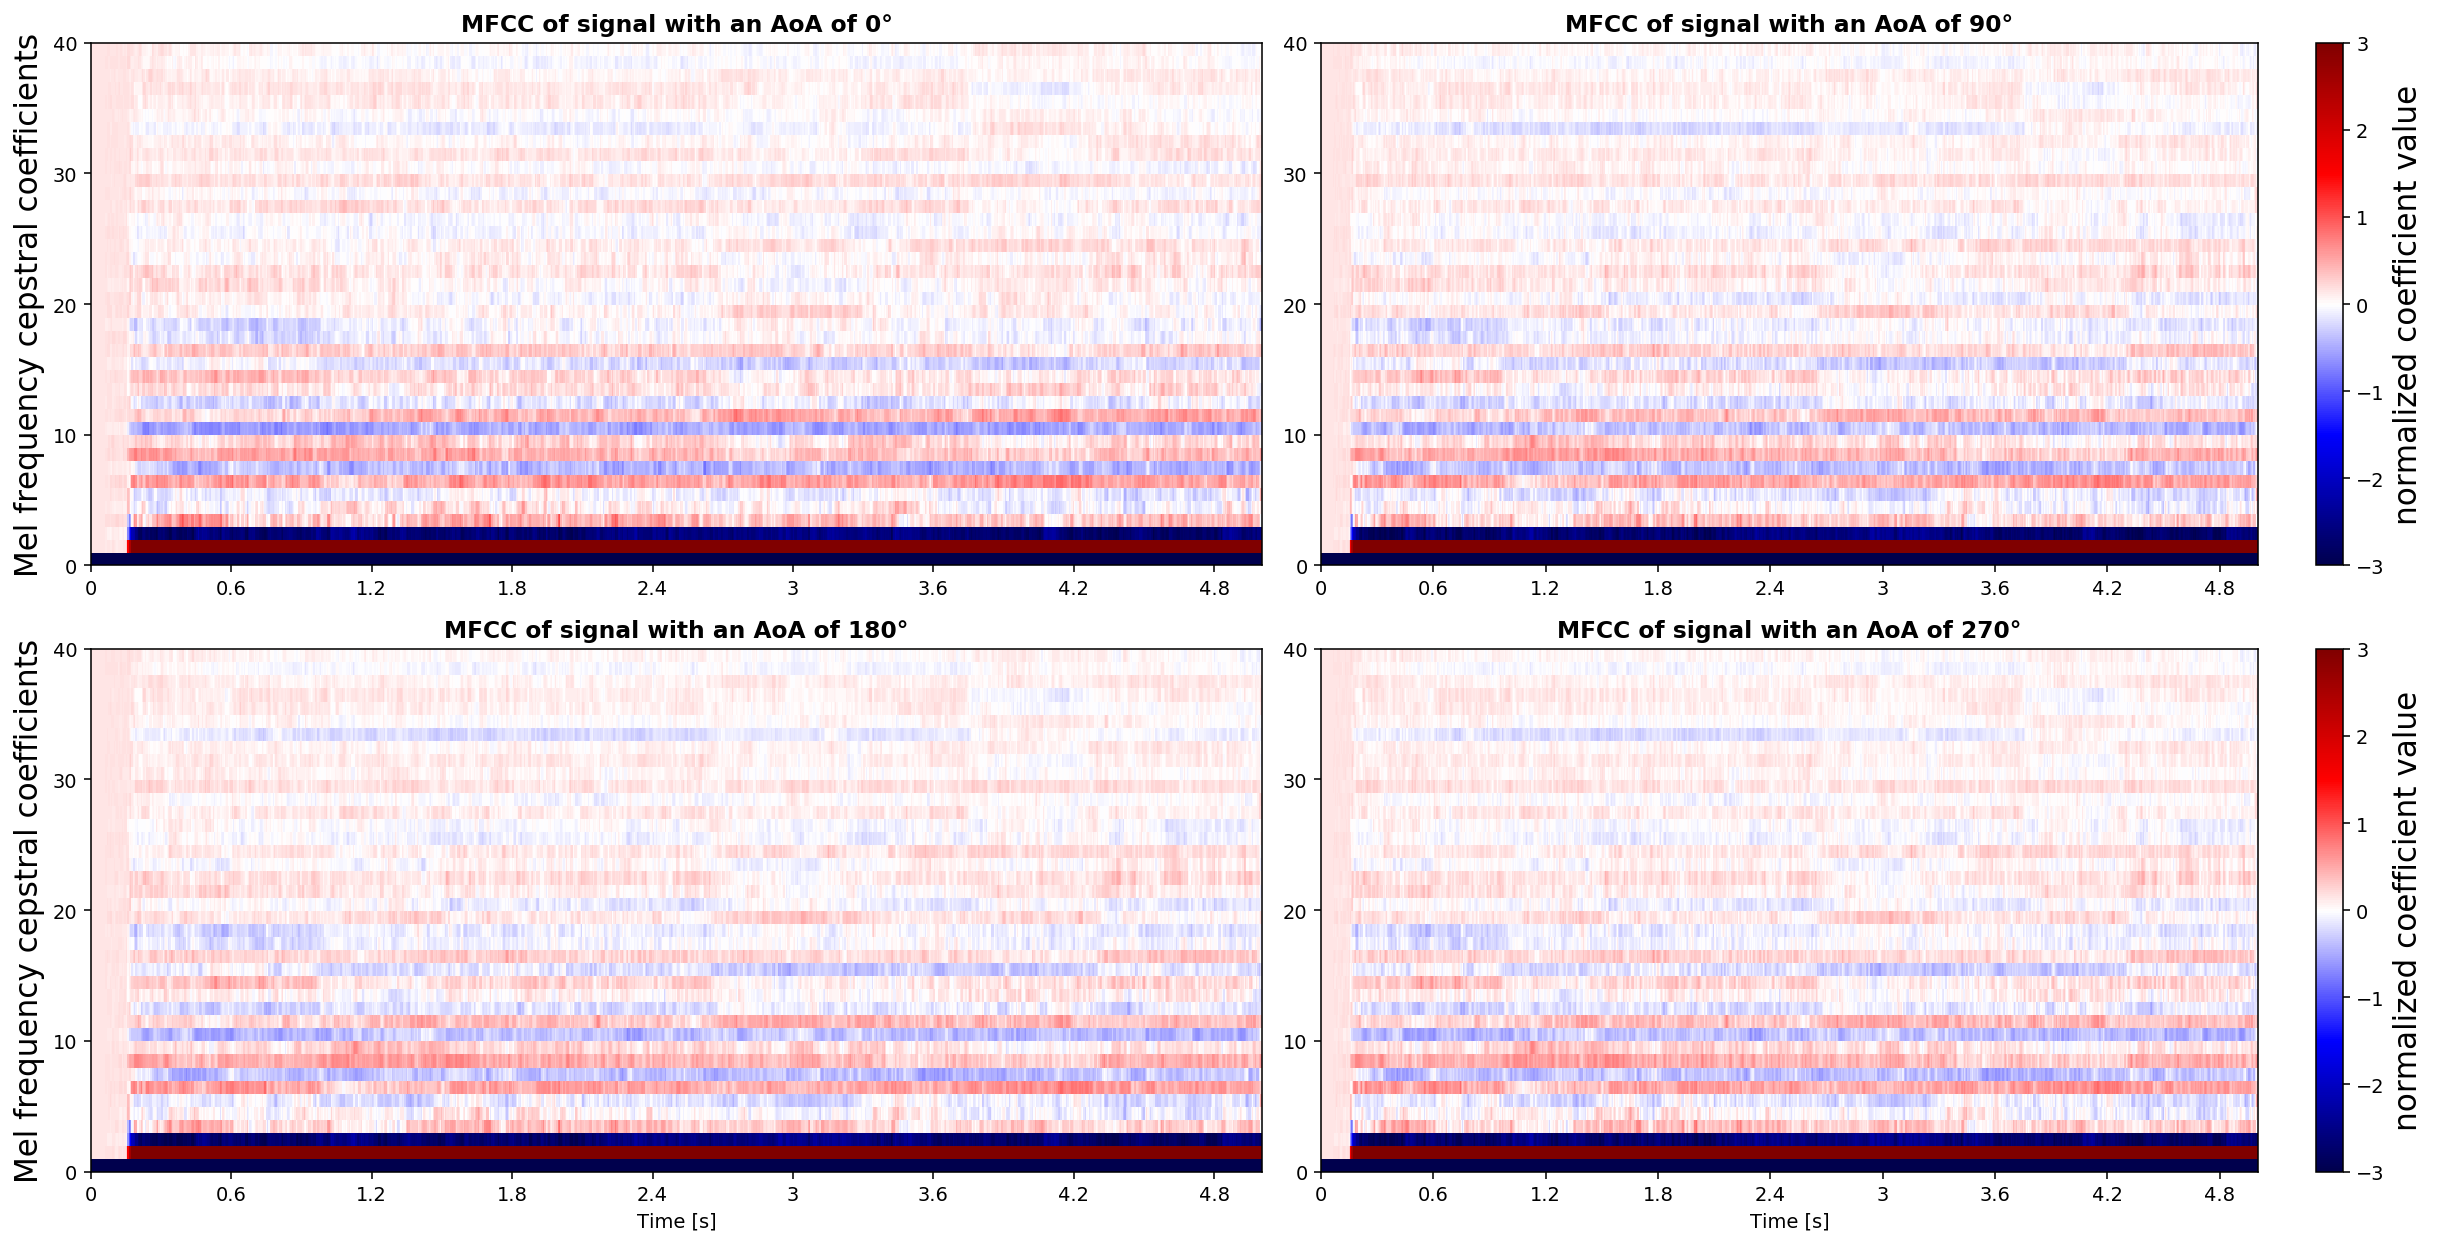

In [23]:
#PLOT 
c_min = -3
c_max = 3
plt.figure(figsize=(18, 9),dpi=140)

plt.subplot(2,2,1)
librosa.display.specshow(mfcc_post_0, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.title('MFCC of signal with an AoA of 0°',weight='bold')
plt.xlabel('')
plt.ylabel('Mel frequency cepstral coefficients',fontsize=16)
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()

plt.subplot(2,2,2)
librosa.display.specshow(mfcc_post_90, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
cb = plt.colorbar()
cb.set_label(label='normalized coefficient value',fontsize=16)
plt.title('MFCC of signal with an AoA of 90°',weight='bold')
plt.xlabel('')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()

plt.subplot(2,2,3)
librosa.display.specshow(mfcc_post_180, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
plt.title('MFCC of signal with an AoA of 180°',weight='bold')
plt.xlabel('Time [s]')
plt.ylabel('Mel frequency cepstral coefficients',fontsize=16)
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()

plt.subplot(2,2,4)
librosa.display.specshow(mfcc_post_270, x_axis='time', hop_length=256, sr=44100,vmin=c_min,vmax=c_max, cmap='seismic')#, y_axis='mel')
cb = plt.colorbar()
cb.set_label(label='normalized coefficient value',fontsize=16)
plt.title('MFCC of signal with an AoA of 270°',weight='bold')
plt.xlabel('Time [s]')
plt.yticks([0,  10.,  20.,  30. , 40. ], [0, 10, 20, 30, 40])
plt.tight_layout()

# plt.savefig(f'D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/comparing_pre_post/{"r_" if isReverse else ""}mfcc_specs_diff_dir_seismic.png')
plt.show()

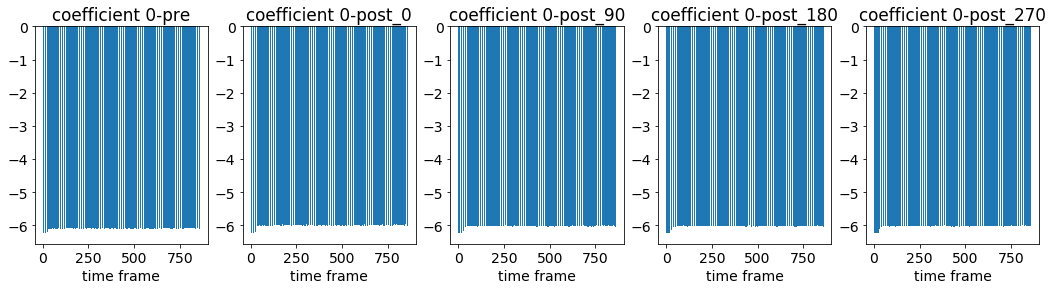

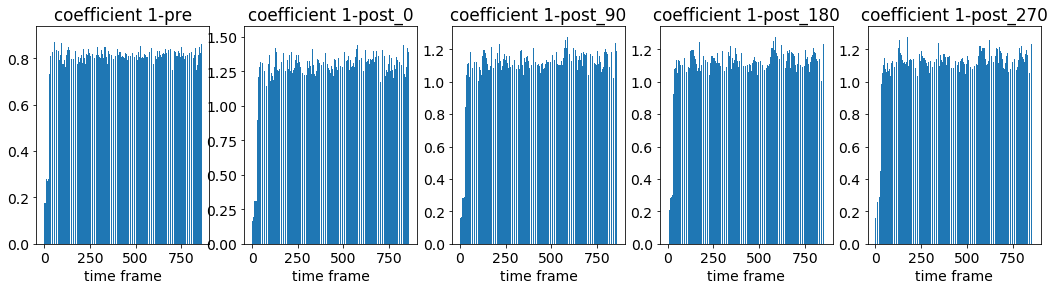

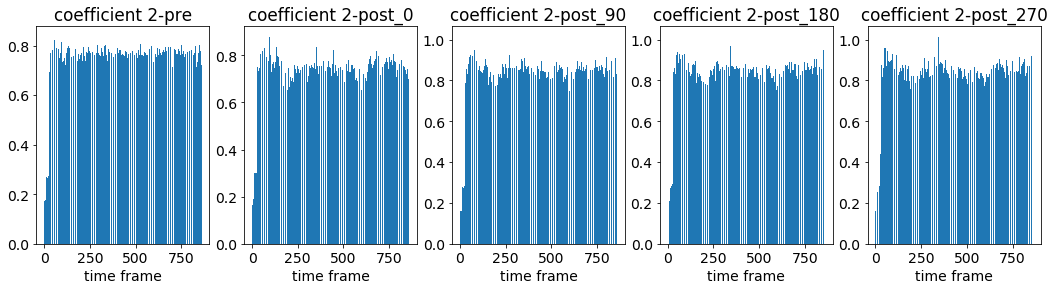

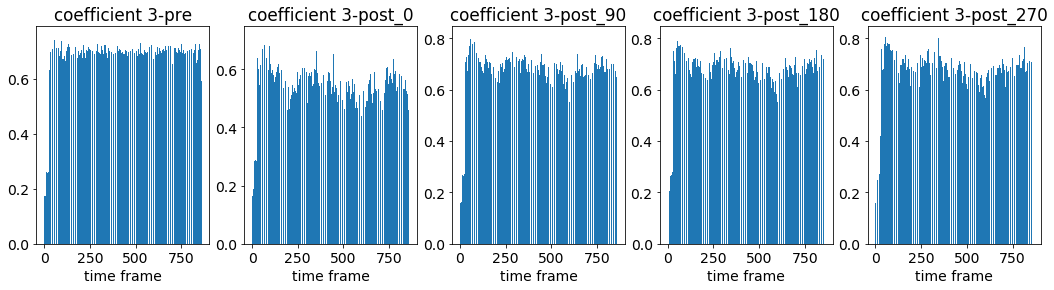

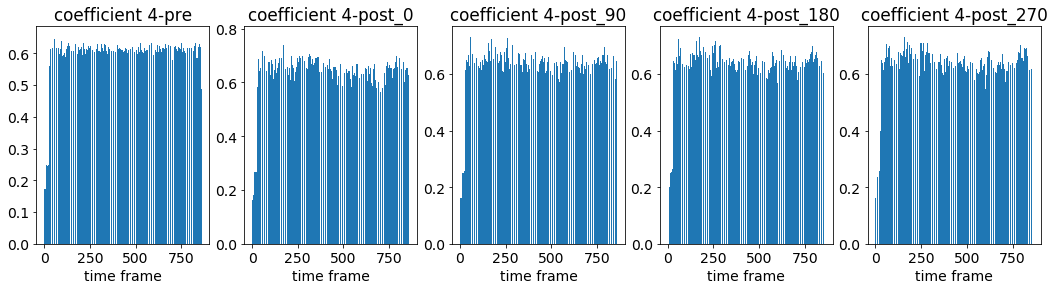

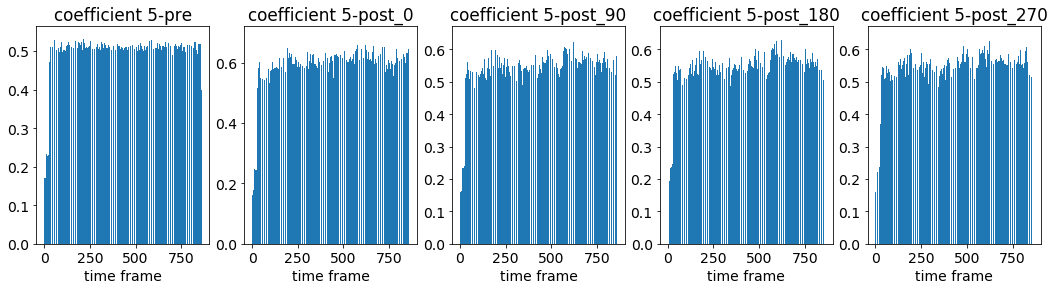

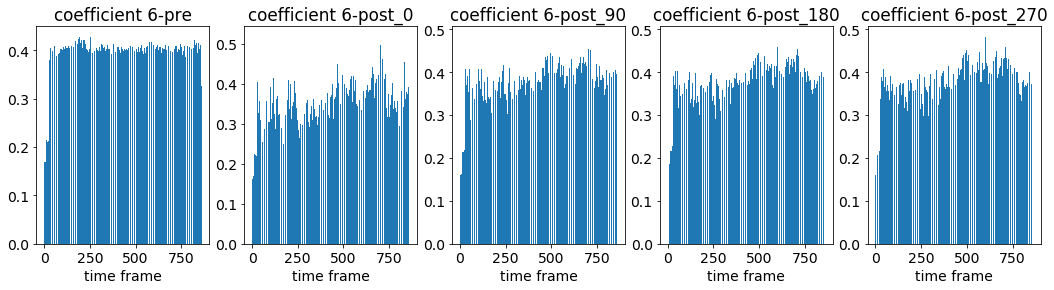

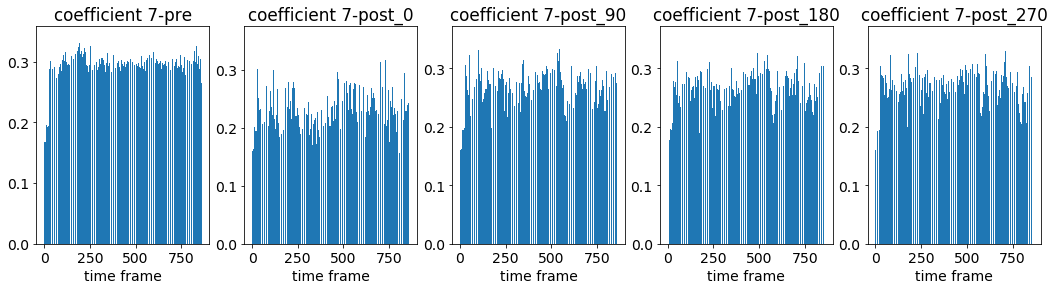

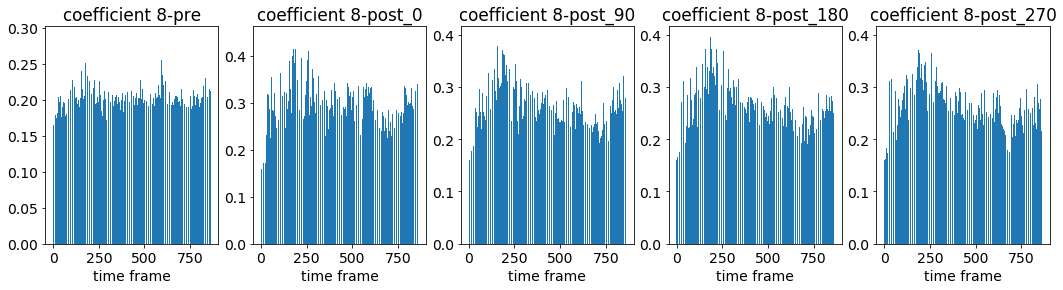

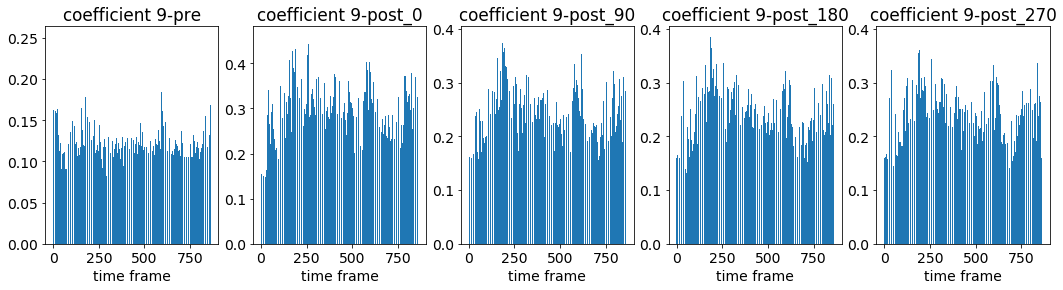

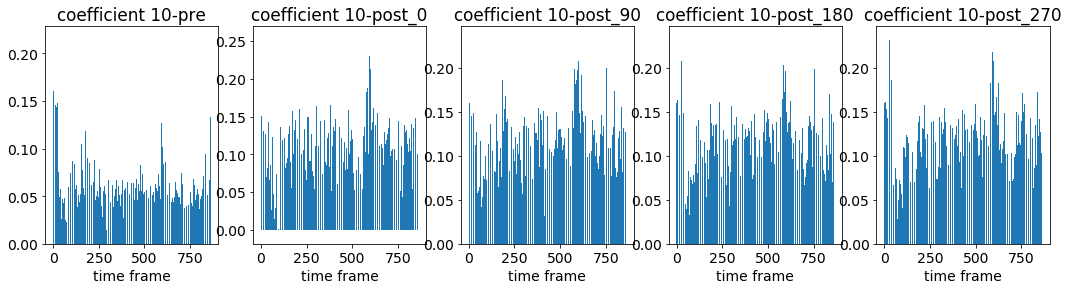

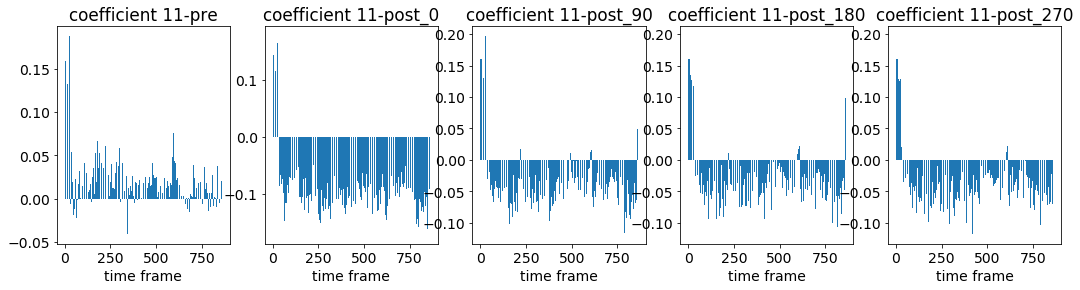

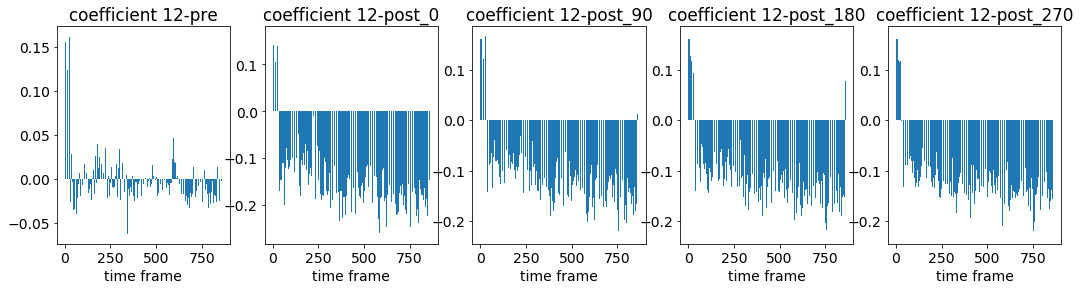

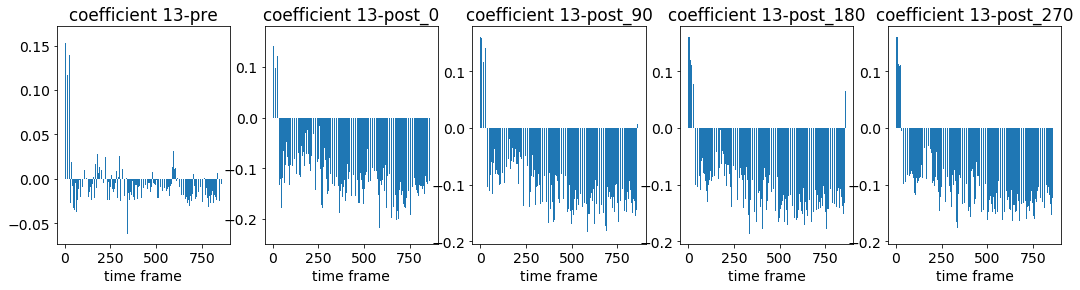

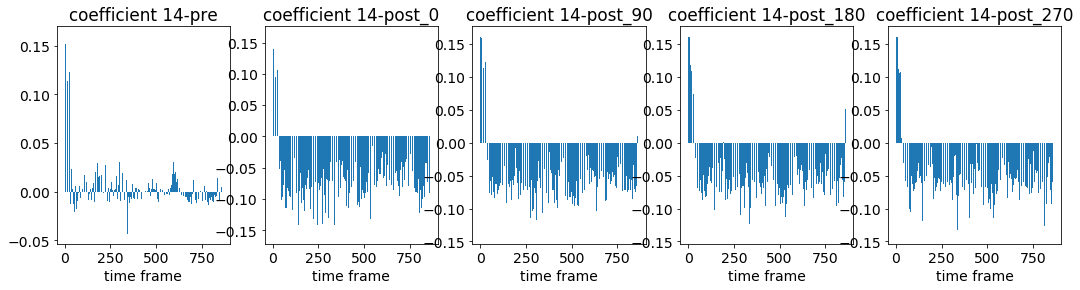

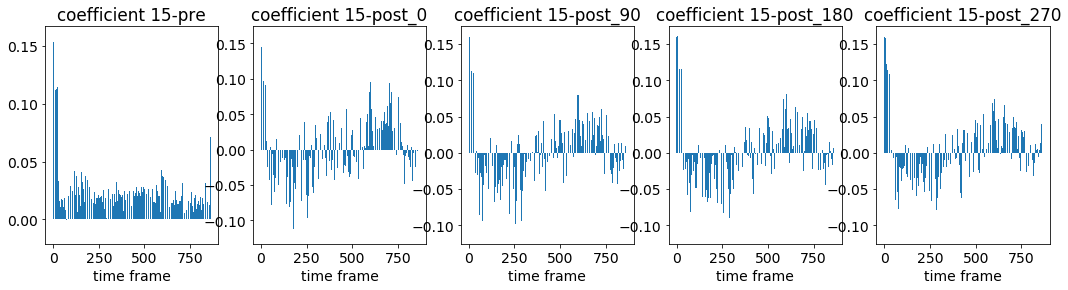

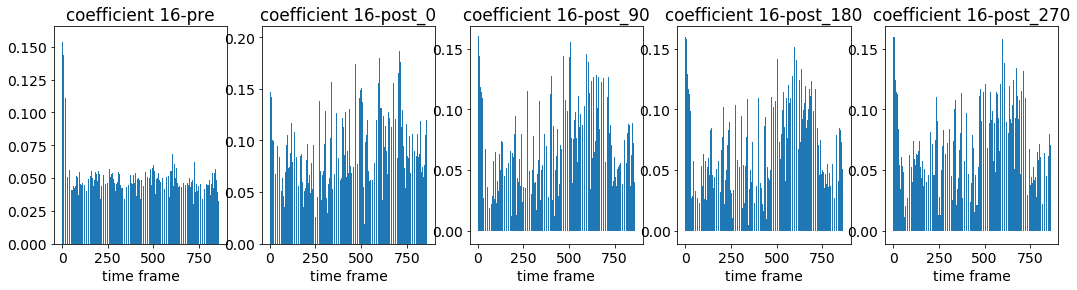

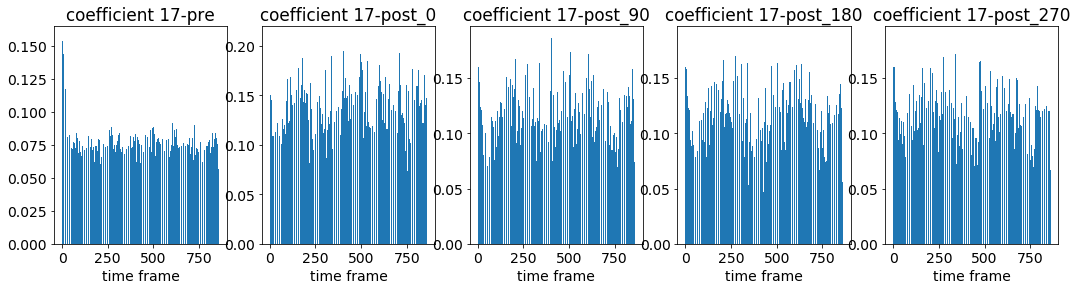

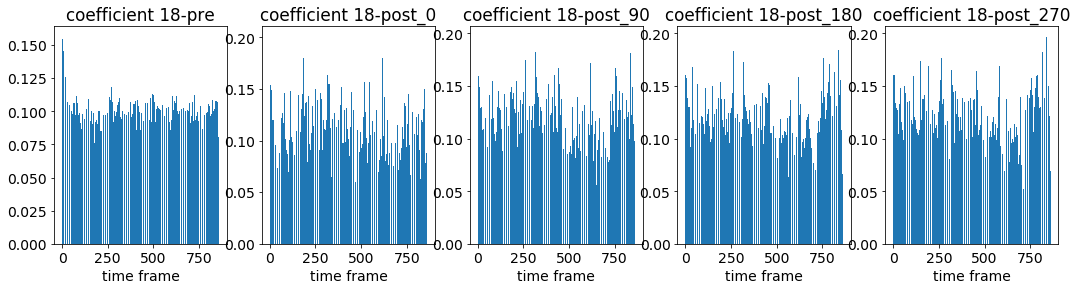

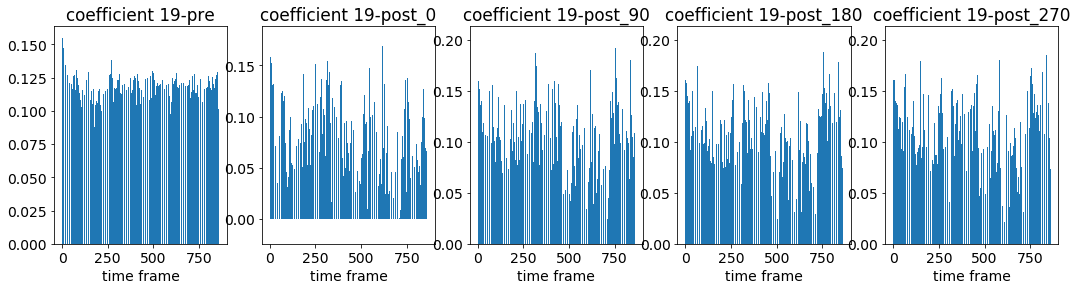

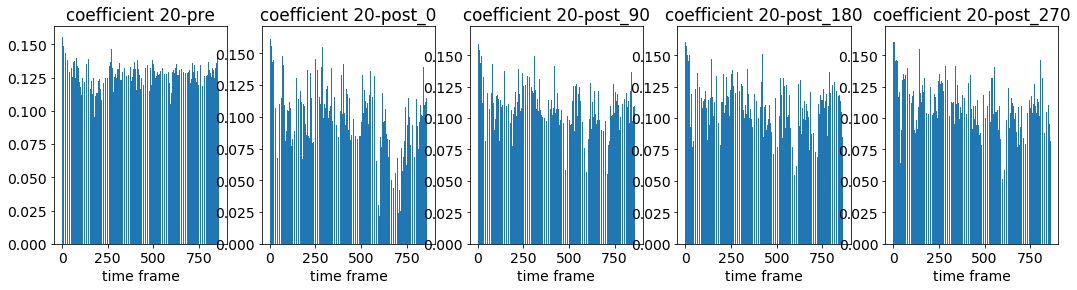

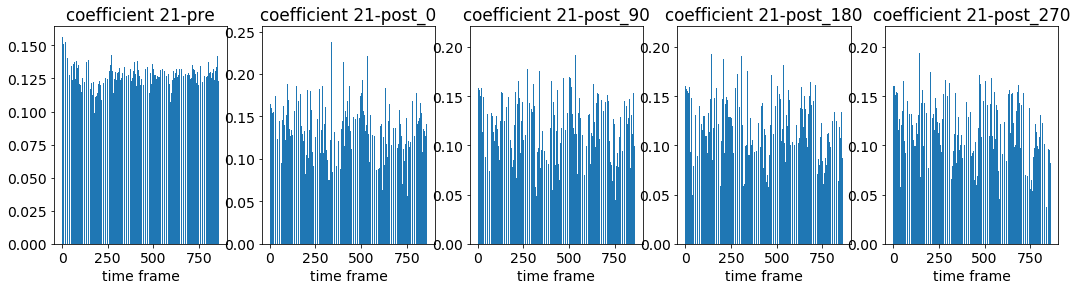

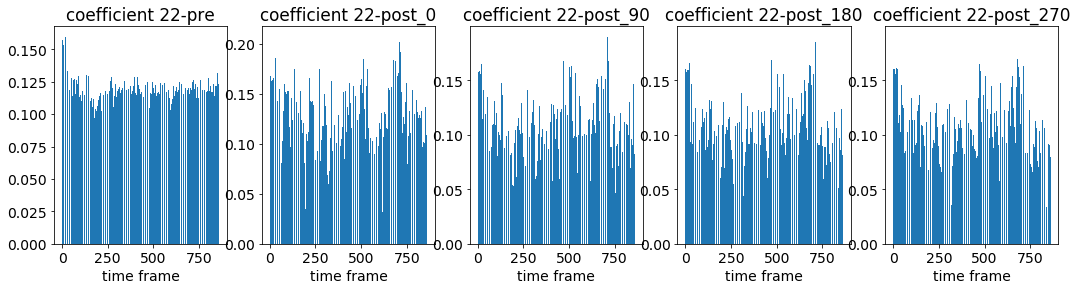

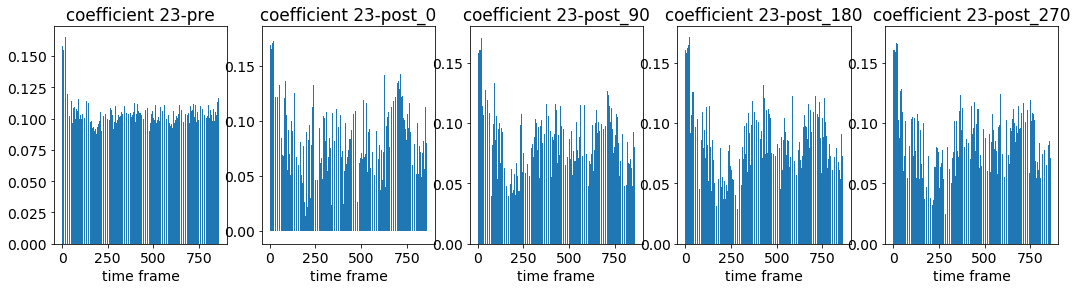

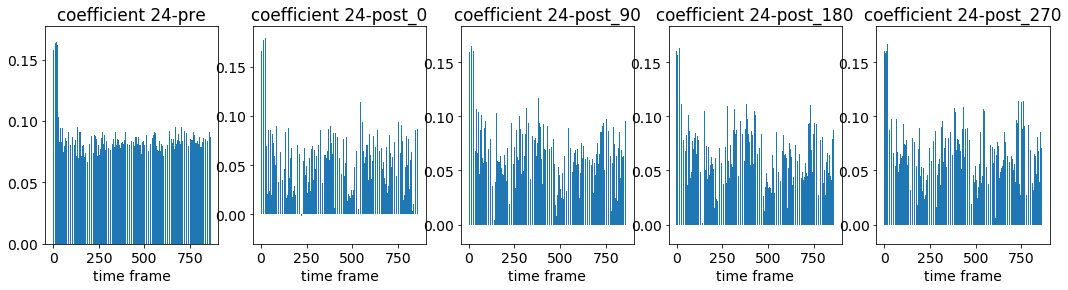

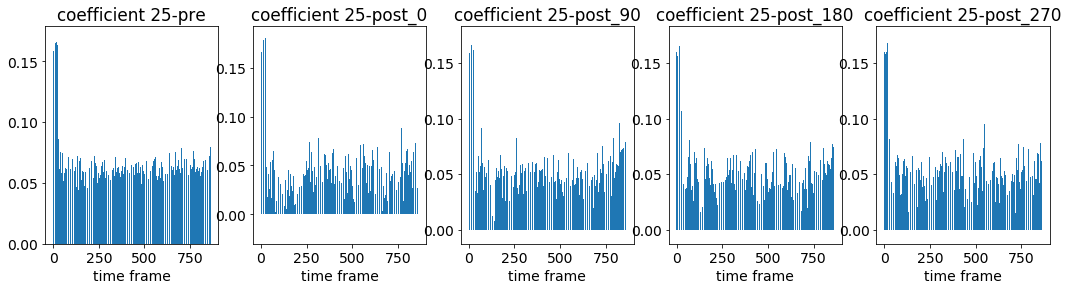

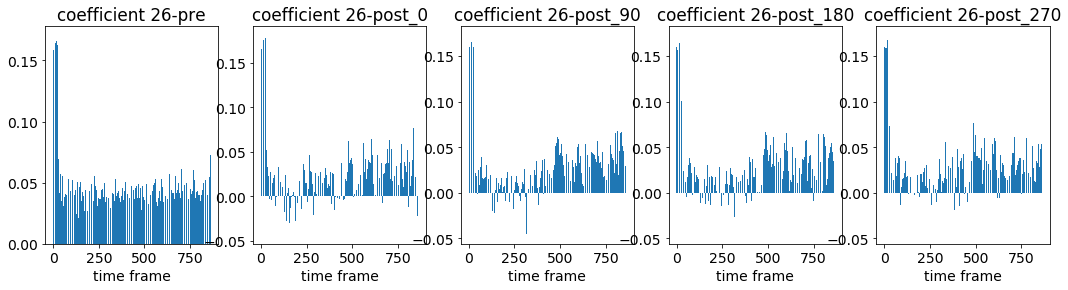

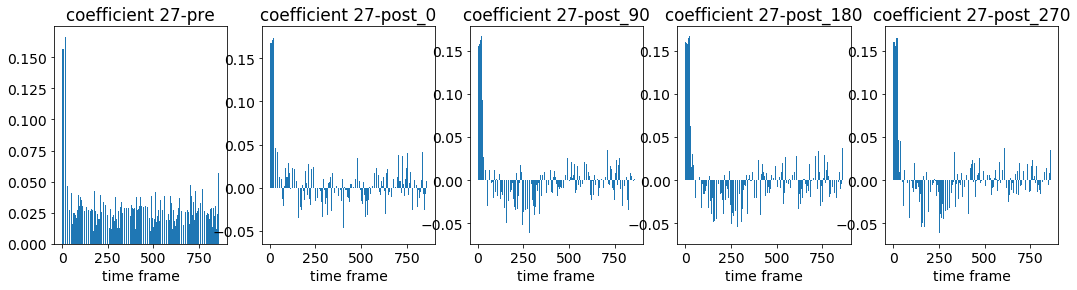

KeyboardInterrupt: 

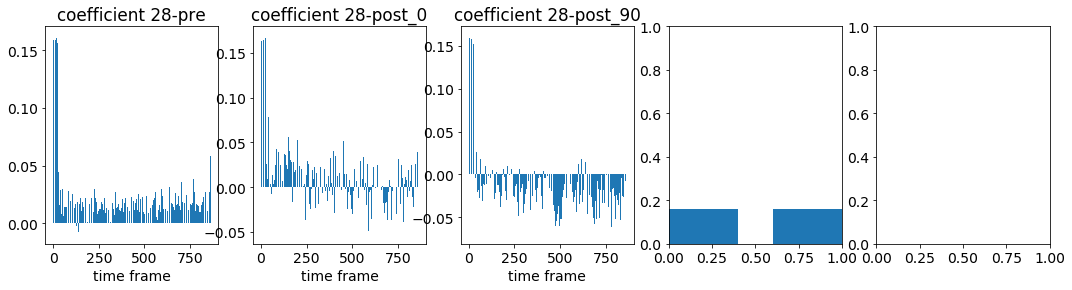

In [33]:
for coef in range(0,40):
    fig, ax = plt.subplots(1, 5,figsize=(18, 4))
    ax[0].bar(np.arange(len(mfcc_pre[coef,:])),mfcc_pre[coef,:], align='center', alpha=1)
    ax[0].set_xlabel('time frame')
    ax[0].set_title(f'coefficient {coef}-pre')
    ax[1].bar(np.arange(len(mfcc_post_0[coef,:])),mfcc_post_0[coef,:], align='center', alpha=1)
    ax[1].set_xlabel('time frame')
    ax[1].set_title(f'coefficient {coef}-post_0')
    ax[2].bar(np.arange(len(mfcc_post_90[coef,:])),mfcc_post_90[coef,:], align='center', alpha=1)
    ax[2].set_xlabel('time frame')
    ax[2].set_title(f'coefficient {coef}-post_90')
    ax[3].bar(np.arange(len(mfcc_post_180[coef,:])),mfcc_post_180[coef,:], align='center', alpha=1)
    ax[3].set_xlabel('time frame')
    ax[3].set_title(f'coefficient {coef}-post_180')
    ax[4].bar(np.arange(len(mfcc_post_270[coef,:])),mfcc_post_270[coef,:], align='center', alpha=1)
    ax[4].set_xlabel('time frame')
    ax[4].set_title(f'coefficient {coef}-post_270')
    plt.show()

PLOT CERTAIN COEFICIENT FOR EACH SIGNAL

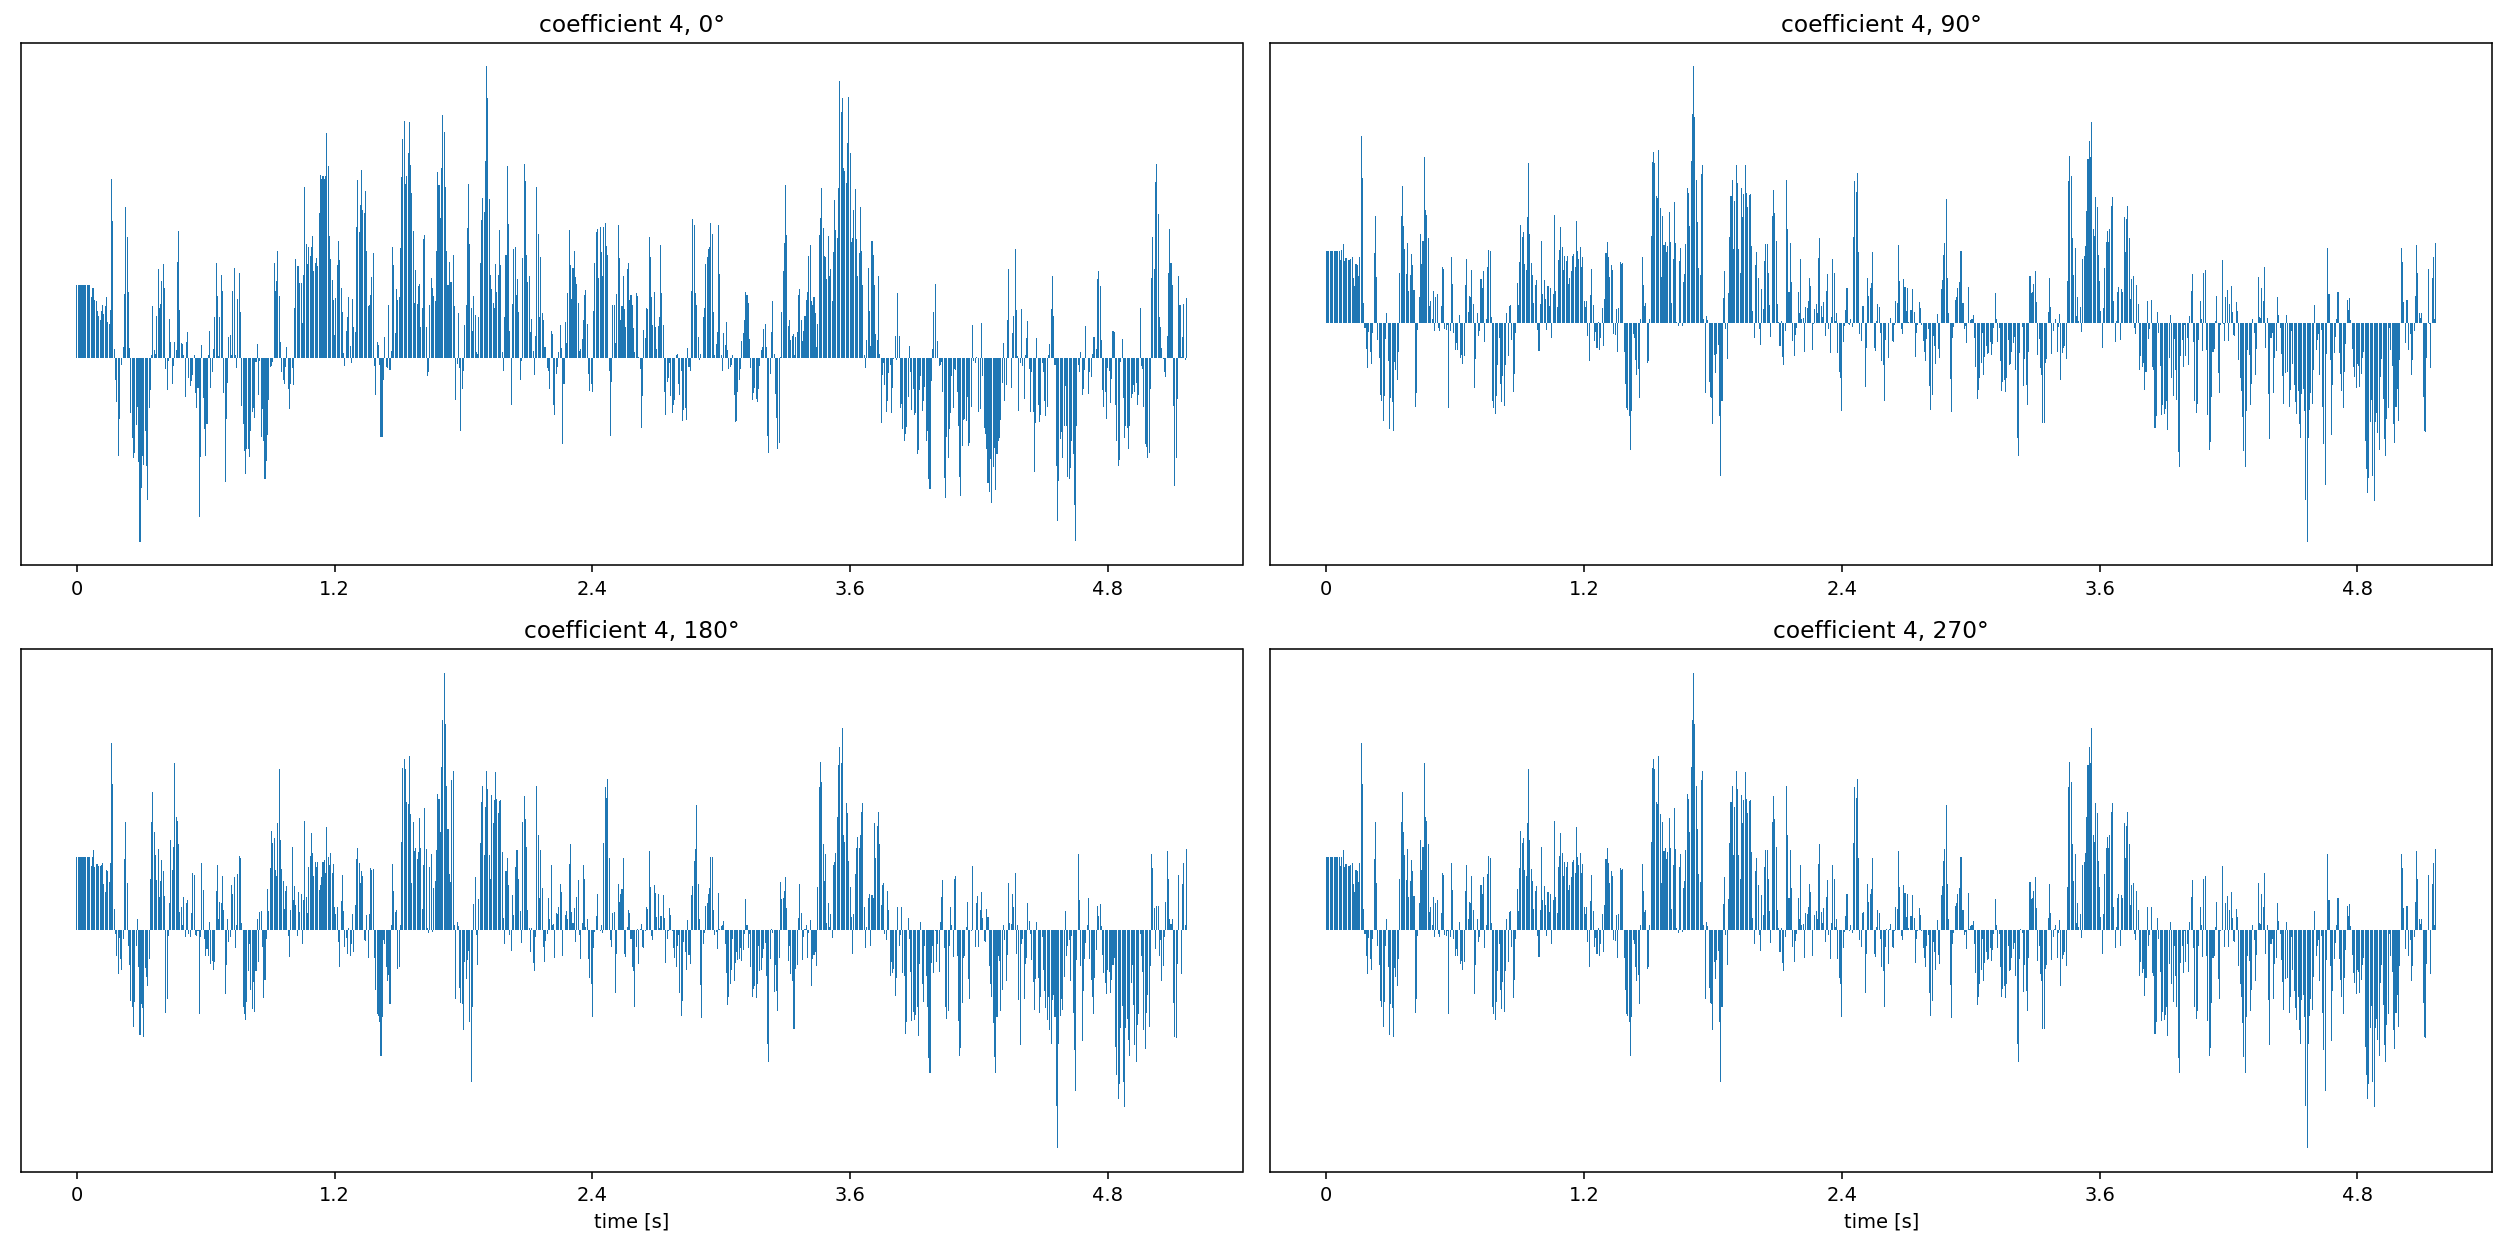

In [25]:
coef = 4
plt.figure(figsize=(18, 9),dpi=140)

plt.subplot(2,2,1)
plt.bar(np.arange(len(mfcc_post_0[coef,:])),mfcc_post_0[coef,:], align='center', alpha=1)
plt.xlabel('')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 0°')

plt.subplot(2,2,2)
plt.bar(np.arange(len(mfcc_post_90[coef,:])),mfcc_post_90[coef,:], align='center', alpha=1)
plt.xlabel('')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 90°')

plt.subplot(2,2,3)
plt.bar(np.arange(len(mfcc_post_180[coef,:])),mfcc_post_180[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 180°')

plt.subplot(2,2,4)
plt.bar(np.arange(len(mfcc_post_270[coef,:])),mfcc_post_270[coef,:], align='center', alpha=1)
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
plt.yticks([])
plt.title(f'coefficient {coef}, 270°')

plt.tight_layout()
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/coef_diff_dir.png')
plt.show()

PLOT ONE COEFFICIENT

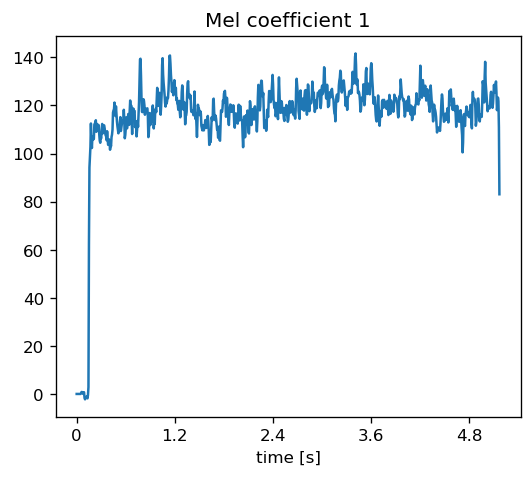

In [42]:
#MEL COEFFICIENT
coef = 1
plt.figure(figsize=(5, 4.2),dpi=120)
plt.plot(mfcc_pre[1,:])
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
# plt.ylabel('value')
plt.title(f'Mel coefficient {coef}')
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_used_coef.png')

PLOT ONE DELTA

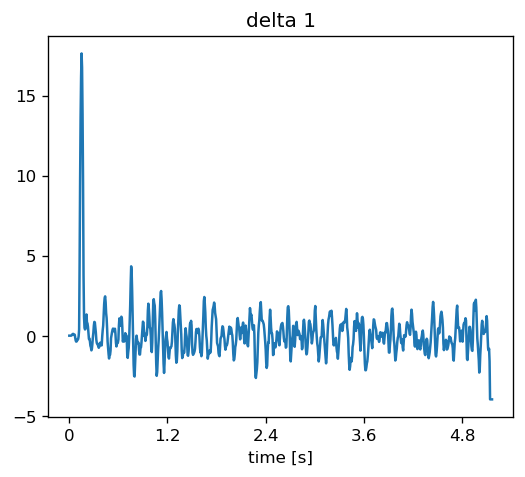

In [43]:
#DELTA
coef = 1
plt.figure(figsize=(5, 4.2),dpi=120)
plt.plot(delta_pre[1,:])
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
# plt.ylabel('value')
plt.title(f'delta {coef}')
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_used_delta.png')

PLOTE ONE DELTA-DELTA

Text(0.5, 1.0, 'delta-delta 1')

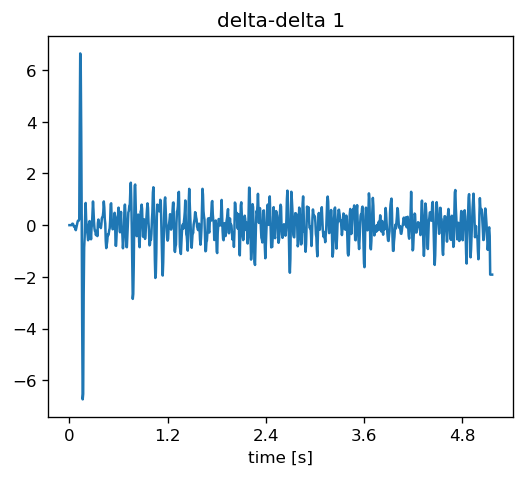

In [26]:
#DELTA-DELTA
coef = 1
plt.figure(figsize=(5, 4.2),dpi=120)
plt.plot(deltaDelta_pre[1,:])
plt.xlabel('time [s]')
plt.xticks([0,200,400,600,800],[0,1.2,2.4,3.6,4.8])
# plt.ylabel('value')
plt.title(f'delta-delta {coef}')
# plt.savefig('D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/example_used_delta.png')